# **__Objectif :__** Ce notebook dédié à l'exploration, au nettoyage et à l'analyse de la feuille "2019".  

# 1. Importation des bibliothèques

In [157]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode
from datetime import datetime
import sys
sys.path.insert(0, '../')
from utils.data_cleaning import afficher_valeurs_manquantes, examiner_colonne, standardiser_colonne, standardiser_group_colonnes, modifier_valeurs, format_date, corriger_arrondissement, ajouter_colonne_ville, remplacer_separateur, corriger_valeurs, extraire_voisins_avant_valeurs_manquantes, remplacer_dates_manquantes, COLUMNS_FORMATED, COLUMNS, TYPE_ELIGIBILITE
from utils.ville import VILLES

# Afficher toutes les colonnes et toutes les lignes
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# 2. Chargement des données

In [158]:
# Chargement des données
df = pd.read_excel("../data/Challenge dataset.xlsx", sheet_name='2019')


# Aperçu rapide des données
df.head(5)

Date de remplissage de la fiche    Date de naissance Niveau d'etude  Genre  \
0                       3/11/0019  1999-09-01 00:00:00    Pas Précisé  Homme   
1                       3/21/0019  1978-02-04 00:00:00  Universitaire  Homme   
2             1977-12-25 00:00:00  1977-12-25 00:00:00     Secondaire  Femme   
3             1986-02-06 00:00:00  1986-02-06 00:00:00     Secondaire  Homme   
4             1988-05-20 00:00:00  1988-05-20 00:00:00    Pas Précisé  Homme   

   Taille  Poids Situation Matrimoniale (SM)            Profession  \
0     NaN    NaN                 Célibataire         Chaudronnier    
1     NaN    NaN                   Marié (e)  Secrétaire comptable   
2     NaN    NaN                   Marié (e)        Commerçant (e)   
3     NaN    NaN                 Célibataire       Homme d’affaire   
4     NaN    NaN                 Célibataire            Beat Maker   

  Arrondissement de résidence Quartier de Résidence   Nationalité  \
0                    Douala 3              Logbaba   Camerounaise   
1       Douala (Non précisé )           NDOGPASSI 2  Camerounaise   
2       Douala (Non précisé )                 Dakar  Camerounaise   
3                    Douala 5               NGANGUE  Camerounaise   
4       Douala (Non précisé )                Douala  Camerounaise   

                   Religion A-t-il (elle) déjà donné le sang  \
0               Pas Précisé                              Oui   
1  Chretien (Ne de nouveau)                              Oui   
2     Chretien (Catholique)                              Oui   
3               Pas Précisé                              Non   
4     Chretien (Catholique)                              Non   

  Si oui preciser la date du dernier don. Taux d’hémoglobine  \
0                     2017-01-01 00:00:00                NaN   
1                     2019-02-26 00:00:00                NaN   
2                     2009-01-01 00:00:00                NaN   
3                                     NaN                NaN   
4                                     NaN               13.6   

  ÉLIGIBILITÉ AU DON. Raison indisponibilité  [Est sous anti-biothérapie  ]  \
0            Eligible                                                NaN      
1            Eligible                                                NaN      
2            Eligible                                                NaN      
3            Eligible                                                NaN      
4            Eligible                                                NaN      

  Raison indisponibilité  [Taux d’hémoglobine bas ]  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                               NaN   
4                                               NaN   

  Raison indisponibilité  [date de dernier Don < 3 mois ]  \
0                                                NaN        
1                                                NaN        
2                                                NaN        
3                                                NaN        
4                                                NaN        

  Raison indisponibilité  [IST récente (Exclu VIH, Hbs, Hcv)]  \
0                                                NaN            
1                                                NaN            
2                                                NaN            
3                                                NaN            
4                                                NaN            

  Date de dernières règles (DDR)   \
0                             NaT   
1                             NaT   
2                             NaT   
3                             NaT   
4                             NaT   

  Raison de l’indisponibilité de la femme [La DDR est mauvais si <14 jour avant le don]  \
0                                    

---
# 3. Exploration initiale des données

In [159]:
# Dimensions du dataset
print(f"Dimensions du dataset : {df.shape} \n")

# Informations sur les colonnes
df.info()


Dimensions du dataset : (1915, 39) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 39 columns):
 #   Column                                                                                     Non-Null Count  Dtype         
---  ------                                                                                     --------------  -----         
 0   Date de remplissage de la fiche                                                            1913 non-null   object        
 1   Date de naissance                                                                          1915 non-null   object        
 2   Niveau d'etude                                                                             1915 non-null   object        
 3   Genre                                                                                      1915 non-null   object        
 4   Taille                                                                                   

In [160]:
afficher_valeurs_manquantes(df)

Colonne  \
0                           Si autres raison préciser   
1                            Autre raisons,  preciser   
2                     Date de dernières règles (DDR)    
3   Raison de l’indisponibilité de la femme [Inter...   
4   Raison de l’indisponibilité de la femme [est e...   
5   Raison de l’indisponibilité de la femme [A acc...   
6   Raison de l’indisponibilité de la femme [La DD...   
7   Raison de l’indisponibilité de la femme [Allai...   
8                                              Taille   
9   Raison de non-eligibilité totale  [Antécédent ...   
10    Raison de non-eligibilité totale  [Hypertendus]   
11     Raison de non-eligibilité totale  [Diabétique]   
12  Raison de non-eligibilité totale  [Drepanocyta...   
13          Raison de non-eligibilité totale  [Opéré]   
14  Raison de non-eligibilité totale  [Porteur(HIV...   
15   Raison de non-eligibilité totale  [Asthmatiques]   
16      Raison de non-eligibilité totale  [Cardiaque]   
17         Raison de non-eligibilité totale  [Tatoué]   
18       Raison de non-eligibilité totale  [Scarifié]   
19                                              Poids   
20  Raison indisponibilité  [IST récente (Exclu VI...   
21  Raison indisponibilité  [date de dernier Don <...   
22  Raison indisponibilité  [Est sous anti-biothér...   
23  Raison indisponibilité  [Taux d’hémoglobine bas ]   
24                     Sélectionner "ok" pour envoyer   
25            Si oui preciser la date du dernier don.   
26                                 Taux d’hémoglobine   
27                    Date de remplissage de la fiche   

    Pourcentage_manquant (%)  
0                  99.321149  
1                  98.955614  
2                  97.911227  
3                  97.023499  
4                  97.023499  
5                  96.971279  
6                  96.919060  
7                  96.919060  
8                  96.762402  
9                  95.195822  
10                 95.195822  
11                 95.195822  
12                 95.195822  
13                 95.195822  
14                 95.195822  
15                 95.195822  
16                 95.195822  
17                 95.195822  
18                 95.195822  
19                 94.464752  
20                 91.749347  
21                 91.644909  
22                 91.279373  
23                 89.608355  
24                 88.459530  
25                 58.328982  
26                 44.125326  
27                  0.104439

#### 📊 Résumé de l'exploration initiale des données

##### 🔎 **Analyse générale**
- Le dataset contient **1915 enregistrements** et **39 colonnes**.
- La majorité des colonnes sont de type **objet**, avec quelques colonnes numériques et une colonne de type **datetime**.

##### 🚨 **Points clés sur les valeurs manquantes**
- Certaines colonnes présentent un **très fort taux de valeurs manquantes** (plus de 95%), notamment :
  - **Raison de non-éligibilité totale** (ex. Tatoué, Diabétique, etc.)
  - **Données spécifiques aux femmes** (DDR, allaitement, grossesse, etc.)
  - Les colonnes **Taille** et **Poids** sont également très incomplètes, avec plus de **90% de valeurs manquantes**.
  
- Des colonnes plus critiques comme **Taux d’hémoglobine** et **Date du dernier don** affichent respectivement **44%** et **58%** de données manquantes.

##### 🟩 **Conclusions**
- Nous devrons **prioriser les colonnes essentielles** pour l’analyse en mettant l'accent sur celles avec un taux de remplissage acceptable.
- Les colonnes avec plus de **95% de données manquantes** pourraient être candidates à la suppression, sauf si elles apportent une valeur ajoutée importante.
- Un nettoyage rigoureux sera nécessaire pour gérer les valeurs manquantes dans les colonnes clés comme **Taux d’hémoglobine**, **Date du dernier don** et **Poids**.

<!-- ##### 🚀 **Prochaine étape**
Nous allons :
1. Identifier les colonnes essentielles pour l’analyse.
2. Mettre en place des stratégies adaptées pour traiter les valeurs manquantes (suppression, remplissage ou autre approche pertinente). -->


---
# 4. Standardiser des colonnes

Standardiser des noms de colonnes pour éviter les incohérences lors des prochaines manipulations

##### **Action clés :**
- Suppression des espaces
- Conversion en minuscules
- Remplacement des espaces par des underscores (_)
- Suppression des accents


In [161]:
# Harmonisation des noms de colonnes
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Renommage des colonnes selon le mapping
df.rename(columns=COLUMNS_FORMATED, inplace=True)

# Aperçu rapide
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1915 entries, 0 to 1914
Data columns (total 39 columns):
 #   Column                                                                                     Non-Null Count  Dtype         
---  ------                                                                                     --------------  -----         
 0   date_de_remplissage                                                                        1913 non-null   object        
 1   date_de_naissance                                                                          1915 non-null   object        
 2   niveau_d_etude                                                                             1915 non-null   object        
 3   genre                                                                                      1915 non-null   object        
 4   taille                                                                                     62 non-null     float64       
 5  

---
# 5. Nettoyage & Exploaration des données

## 5.1- Eligibilter au don de sang
<!-- #### 5.1.1- Examinations de cette colonne
Notre objectif est de :
- Comprendre les caractéristiques de base de la colonne  
    ✅ Type de données (object, int, float, datetime, etc.)  
    ✅ Nombre total de valeurs non-nulles  

- Identifier les différentes valeurs présentes (utile pour les colonnes catégorielles).  
    ✅ Nombre de valeurs uniques  
    ✅ Liste des valeurs uniques  
    ✅ Nombre d'occurrences de chaque valeur  

- Identifier les erreurs courantes dans les valeurs.  
    ✅ Erreurs typographiques (ex. majuscules/minuscules incohérentes)  
    ✅ Espaces inutiles  
    ✅ Présence de caractères spéciaux ou de fautes de frappe  

- Détecter les valeurs identiques répétées  
    ✅ Recherche de doublons exacts  
    ✅ Recherche de doublons proches (ex. fautes de frappe)  

- Comprendre les motifs des valeurs manquantes ou incohérentes.  
    ✅ Proportion de valeurs manquantes (%)  
    ✅ Patrons particuliers (ex. vides, espaces, symboles inhabituels comme 'NA')   -->


In [162]:
examiner_colonne(df, COLUMNS['ELIGIBILITE_AU_DON'])

🔎 **Examen de la colonne : `eligibilite_au_don`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 3
eligibilite_au_don
Eligible                       1602
Temporairement Non-eligible     221
Définitivement non-eligible      92
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 313



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')



🏆 **Mode (valeur la plus fréquente) :** `Eligible`
🔵 Analyse des valeurs inhabituelles :
eligibilite_au_don
Eligible                       1602
Temporairement Non-eligible     221
Définitivement non-eligible      92
Name: count, dtype: int64

✅ **Examen terminé**



### 🔎 **Observation**
- La colonne est complète (aucune valeur manquante).
- La répartition des valeurs est bien définie avec 3 catégories distinctes.
- La présence de **313 caractères spéciaux** nécessitera une **vérification approfondie** pour s'assurer que ces caractères ne compromettent pas la qualité des données.

### 🛠️ **Traitements à effectuer**
- **Standardisation des valeurs** (ex. uniformiser la casse).  



In [163]:
# Dictionnaire de correction
correction_mapping = {
    'eligible': TYPE_ELIGIBILITE['ELIGIBLE'],
    'temporairement non-eligible': TYPE_ELIGIBILITE['TEMPORAIREMENT_NON_ELIGIBLE'],
    'définitivement non-eligible': TYPE_ELIGIBILITE['DEFINITIVEMENT_NON_ELIGIBLE'],
}

df = standardiser_colonne(df, COLUMNS['ELIGIBILITE_AU_DON'], correction_mapping)

examiner_colonne(df, COLUMNS['ELIGIBILITE_AU_DON'])

✅ Colonne `eligibilite_au_don` standardisée avec succès !
🔎 **Examen de la colonne : `eligibilite_au_don`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 3
eligibilite_au_don
eligible                       1602
temporairement non-eligible     221
définitivement non-eligible      92
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 313



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')



🏆 **Mode (valeur la plus fréquente) :** `eligible`
🔵 Analyse des valeurs inhabituelles :
eligibilite_au_don
eligible                       1602
temporairement non-eligible     221
définitivement non-eligible      92
Name: count, dtype: int64

✅ **Examen terminé**



## 5.2- Raison de non éligibilité et d'indisponibilité

### 5.2.1) Lignes avec individus éligibles ayant au moins une raison d'indisponibilité ou de non-éligibilité

In [164]:
eligible_rows = df[
    (df[COLUMNS['ELIGIBILITE_AU_DON']] == TYPE_ELIGIBILITE['ELIGIBLE']) &                                                                    # Condition : Éligible
    df[COLUMNS['RAISON_INDISPONIBILITE'] + COLUMNS['RAISON_INDISPONIBILITE_FEMME'] + COLUMNS['RAISON_NON_ELIGIBLE']].notnull().any(axis=1)   # Au moins une colonne avec une valeur non-nulle parmi les critères
]

eligible_rows.shape

(0, 39)

- **Nombre de lignes** : **0**  

**🔎 Interprétation** :  
-   Aucun individu déclaré "Éligible" ne présente de critère d'indisponibilité ou de non-éligibilité.  
-  Cela est **cohérent** et rassurant : les individus éligibles sont bien conformes aux critères attendus. Donc nous allons remplacer ces valeurs manquantes par **Non**

### 5.2.2) Lignes avec individus temporairement non-éligibles ayant au moins une raison d'indisponibilité ou de non-éligibilité

In [165]:
temp_non_eligible_rows = df[
    (df[COLUMNS['ELIGIBILITE_AU_DON']] == TYPE_ELIGIBILITE['TEMPORAIREMENT_NON_ELIGIBLE']) &                                                                 # Condition : Temporairement Non-eligible
    df[COLUMNS['RAISON_INDISPONIBILITE'] + COLUMNS['RAISON_INDISPONIBILITE_FEMME'] + COLUMNS['RAISON_NON_ELIGIBLE']].notnull().any(axis=1)                   # Au moins une colonne avec une valeur non-nulle parmi les critères
]


temp_non_eligible_rows.shape

(214, 39)

- **Nombre de lignes** : **214**  

**🔎 Interprétation** :  
-   214 individus presentent une raison qui justifie leur statut.  
-   le reste ne presentent aucune sur les raisons standards

### 5.2.3) Lignes avec individus temporairement non-éligibles n'ayant aucune raison d'indisponibilité et autre raison

In [166]:
# Aucune raison d'indisponibilité seulement
temp_non_eligible_rows_2 = df[
    (df[COLUMNS['ELIGIBILITE_AU_DON']] == TYPE_ELIGIBILITE['TEMPORAIREMENT_NON_ELIGIBLE']) &                                                                    # Condition : Temporairement Non-eligible
    df[COLUMNS['RAISON_INDISPONIBILITE'] + COLUMNS['RAISON_INDISPONIBILITE_FEMME'] + COLUMNS['RAISON_NON_ELIGIBLE']].isnull().all(axis=1)                       # Au moins une colonne avec une valeur non-nulle parmi les critères
]

temp_non_eligible_rows_2.shape

(7, 39)

In [167]:
# Aucune raison d'indisponibilité et autre raison
# Définition de la condition pour sélectionner les lignes spécifiques
condition_1 = (
    (df[COLUMNS['ELIGIBILITE_AU_DON']] == TYPE_ELIGIBILITE['TEMPORAIREMENT_NON_ELIGIBLE']) &
    df[COLUMNS['RAISON_INDISPONIBILITE'] + 
                  COLUMNS['RAISON_INDISPONIBILITE_FEMME'] + 
                  COLUMNS['RAISON_NON_ELIGIBLE'] + 
                  [COLUMNS['AUTRE_RAISON'], COLUMNS['SI_AUTRES_RAISON_PRECISER']]
                 ].isnull().all(axis=1)
)

temp_non_eligible_rows_3 = df[condition_1]

temp_non_eligible_rows_3

date_de_remplissage    date_de_naissance niveau_d_etude  genre  taille  \
1832  2019-05-29 00:00:00  1996-02-06 00:00:00     Secondaire  Homme     NaN   

      poids situation_matrimoniale_(sm)         profession  \
1832    NaN                 Célibataire  APPRENTI TOLERIE    

     arrondissement_de_residence quartier_de_residence   nationalite  \
1832       Douala (Non précisé )              NEW BELL  Camerounaise   

                    religion a_t_il_elle_deja_donne_le_sang  \
1832  Chretien (Protestant )                            Oui   

     si_oui_preciser_la_date_du_dernier_don taux_d_hemoglobine  \
1832                    2019-01-06 00:00:00                NaN   

               eligibilite_au_don  \
1832  temporairement non-eligible   

     raison_indisponibilité__[est_sous_anti-biothérapie__]  \
1832                                                NaN      

     raison_indisponibilité__[taux_d’hémoglobine_bas_]  \
1832                                               NaN   

     raison_indisponibilité__[date_de_dernier_don_<_3_mois_]  \
1832                                                NaN        

     raison_indisponibilité__[ist_récente_(exclu_vih,_hbs,_hcv)]  \
1832                                                NaN            

     date_de_dernieres_regles_(ddr)  \
1832                            NaT   

     raison_de_l’indisponibilité_de_la_femme_[la_ddr_est_mauvais_si_<14_jour_avant_le_don]  \
1832                                                NaN                                      

     raison_de_l’indisponibilité_de_la_femme_[allaitement_]  \
1832                                                NaN       

     raison_de_l’indisponibilité_de_la_femme_[a_accoucher_ces_6_derniers_mois__]  \
1832                                                NaN                            

     raison_de_l’indisponibilité_de_la_femme_[interruption_de_grossesse__ces_06_derniers_mois]  \
1832                                                NaN                                          

     raison_de_l’indisponibilité_de_la_femme_[est_enceinte_]  \
1832                                                NaN        

     autre_raisons,__preciser selectionner_"ok"_pour_envoyer  \
1832                      NaN                             Ok   

     raison_de_non-eligibilité_totale__[antécédent_de_transfusion]  \
1832                                                NaN              

     raison_de_non-eligibilité_totale__[porteur(hiv,hbs,hcv)]  \
1832                                                NaN         

     raison_de_non-eligibilité_totale__[opéré]  \
1832                                       NaN   

     raison_de_non-eligibilité_totale__[drepanocytaire]  \
1832                                                NaN   

     raison_de_non-eligibilité_totale__[diabétique]  \
1832                                            NaN   

     raison_de_non-eligibilité_totale__[hypertendus]  \
1832                                             NaN   

     raison_de_non-eligibilité_totale__[asthmatiques]  \
1832                                              NaN   

     raison_de_non-eligibilité_totale__[cardiaque]  \
1832                                           NaN   

     raison_de_non-eligibilité_totale__[tatoué]  \
1832                                        NaN   

     raison_de_non-eligibilité_totale__[scarifié] si_autres_raison_preciser  
1832                                          NaN                       NaN

- **Nombre de lignes ayant aucune raison d'indisponibilité seulement** : **07**
- **Nombre de lignes ayant aucune raison d'indisponibilité et autre raison** :**01**  

**🔎 Interprétation**  
- 1 individu est déclaré "Temporairement Non-Éligibles" et présentent aucun critère d'indisponibilité, de non éligilité et une autre raison. 

-  Cela **n'est pas logique** et indique que cet enregistrement est **incohérents** mais nous constattion qu'il a deja eu a donner le  et qu'il s'agit d'une erreur qu'il peut avoir une raison de indisponibité a cause de date de dernier don de sang. Donc nous allons remplacer cette valeur par **Oui**

### 5.2.4) Lignes avec individus définitivement non-éligibles ayant au moins une raison d'indisponibilité ou de non-éligibilité

In [168]:
def_non_eligible_rows = df[
    (df[COLUMNS['ELIGIBILITE_AU_DON']] == TYPE_ELIGIBILITE['DEFINITIVEMENT_NON_ELIGIBLE']) &                                                                 # Condition : Définitivement Non-eligible
    df[COLUMNS['RAISON_INDISPONIBILITE'] + COLUMNS['RAISON_INDISPONIBILITE_FEMME'] + COLUMNS['RAISON_NON_ELIGIBLE']].notnull().any(axis=1)                   # Au moins une colonne avec une valeur non-nulle parmi les critères
]


def_non_eligible_rows.shape

(92, 39)

- **Nombre de lignes** : **92**  

**🔎 Interprétation** :  
- Ces individus sont déclarés "Définitivement Non-Éligibles" et présentent bien au moins un critère qui justifie leur statut.  
- Cela est **cohérent** et conforme aux attentes.

### 🛠️ **Traitements à effectuer**
- **Standardisation des valeurs** (ex. uniformiser la casse).  
- **Remplacement des valeurs  par *oui*** sur le critère de dernier don de sang  Si l'individus n'a aucun raison de non éligibilité, de indisponibilité et autre raison. 
- **Remplacement des valeurs par *non*** Car ces individus ne respecte pas ces conditions.

In [169]:
# Standardisation des valeurs
df = standardiser_group_colonnes(df, COLUMNS['RAISON_INDISPONIBILITE'])
df = standardiser_group_colonnes(df, COLUMNS['RAISON_INDISPONIBILITE_FEMME'])
df = standardiser_group_colonnes(df, COLUMNS['RAISON_NON_ELIGIBLE'])

✅ Colonne `raison_indisponibilité__[est_sous_anti-biothérapie__]` standardisée avec succès !
✅ Colonne `raison_indisponibilité__[taux_d’hémoglobine_bas_]` standardisée avec succès !
✅ Colonne `raison_indisponibilité__[date_de_dernier_don_<_3_mois_]` standardisée avec succès !


✅ Colonne `raison_indisponibilité__[ist_récente_(exclu_vih,_hbs,_hcv)]` standardisée avec succès !
✅ Colonne `raison_de_l’indisponibilité_de_la_femme_[la_ddr_est_mauvais_si_<14_jour_avant_le_don]` standardisée avec succès !
✅ Colonne `raison_de_l’indisponibilité_de_la_femme_[allaitement_]` standardisée avec succès !
✅ Colonne `raison_de_l’indisponibilité_de_la_femme_[a_accoucher_ces_6_derniers_mois__]` standardisée avec succès !
✅ Colonne `raison_de_l’indisponibilité_de_la_femme_[interruption_de_grossesse__ces_06_derniers_mois]` standardisée avec succès !
✅ Colonne `raison_de_l’indisponibilité_de_la_femme_[est_enceinte_]` standardisée avec succès !
✅ Colonne `raison_de_non-eligibilité_totale__[antécédent_de_transfusion]` standardisée avec succès !
✅ Colonne `raison_de_non-eligibilité_totale__[porteur(hiv,hbs,hcv)]` standardisée avec succès !
✅ Colonne `raison_de_non-eligibilité_totale__[opéré]` standardisée avec succès !
✅ Colonne `raison_de_non-eligibilité_totale__[drepanocytaire]` st

In [170]:
# Modification de la colonne cible
df = modifier_valeurs(
    df, 
    condition_1, 
    COLUMNS['RAISON_INDISPONIBILITE'][2], 
    'oui'
)

display( df.loc[condition_1, COLUMNS['RAISON_INDISPONIBILITE'][2] ])

✅ La colonne `raison_indisponibilité__[date_de_dernier_don_<_3_mois_]` a été mise à jour avec la valeur `oui` pour les lignes respectant la condition.


1832    oui
Name: raison_indisponibilité__[date_de_dernier_don_<_3_mois_], dtype: object

In [171]:
# Remplacement des valeurs par *non*
df[COLUMNS['RAISON_INDISPONIBILITE'] + COLUMNS['RAISON_INDISPONIBILITE_FEMME'] + COLUMNS['RAISON_NON_ELIGIBLE']] = df[COLUMNS['RAISON_INDISPONIBILITE'] + COLUMNS['RAISON_INDISPONIBILITE_FEMME'] + COLUMNS['RAISON_NON_ELIGIBLE']].fillna('non')

🔎 **Examen de la colonne : `raison_indisponibilité__[date_de_dernier_don_<_3_mois_]`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 2
raison_indisponibilité__[date_de_dernier_don_<_3_mois_]
non    1909
oui       6
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 0



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


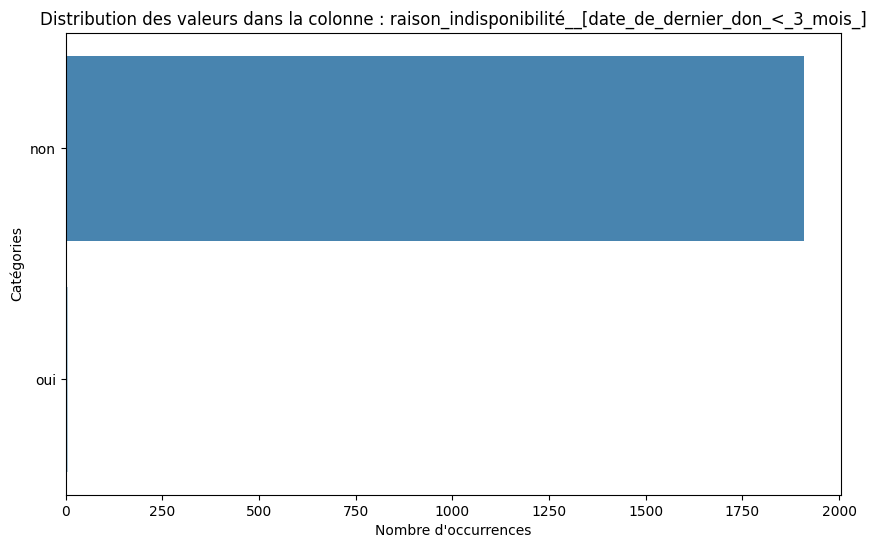


🏆 **Mode (valeur la plus fréquente) :** `non`
🔵 Analyse des valeurs inhabituelles :
raison_indisponibilité__[date_de_dernier_don_<_3_mois_]
non    1909
oui       6
Name: count, dtype: int64

✅ **Examen terminé**



In [172]:
examiner_colonne(df, COLUMNS['RAISON_INDISPONIBILITE'][2])

## 5.3- autre_raisons,__preciser

🔎 **Examen de la colonne : `autre_raisons,__preciser`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 20 / 1915
- Proportion de valeurs manquantes : 98.96%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 19
autre_raisons,__preciser
Consommation de drogue                              2
opérée                                              1
Voyagé dans des zones épidémiques                   1
RAISON NON PRECISEE                                 1
RAS                                                 1
PAS DE RAISON SPECIFIQUES                           1
CONSOMMATION DE DROGUES                             1
RAPPORT NON PROTEGER                                1
RAPPORTS NON PROTEGES                               1
Eu à consommer de la cocaïne et d autre drogues     1
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 1901
- Présence de caractères spéciaux 

/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


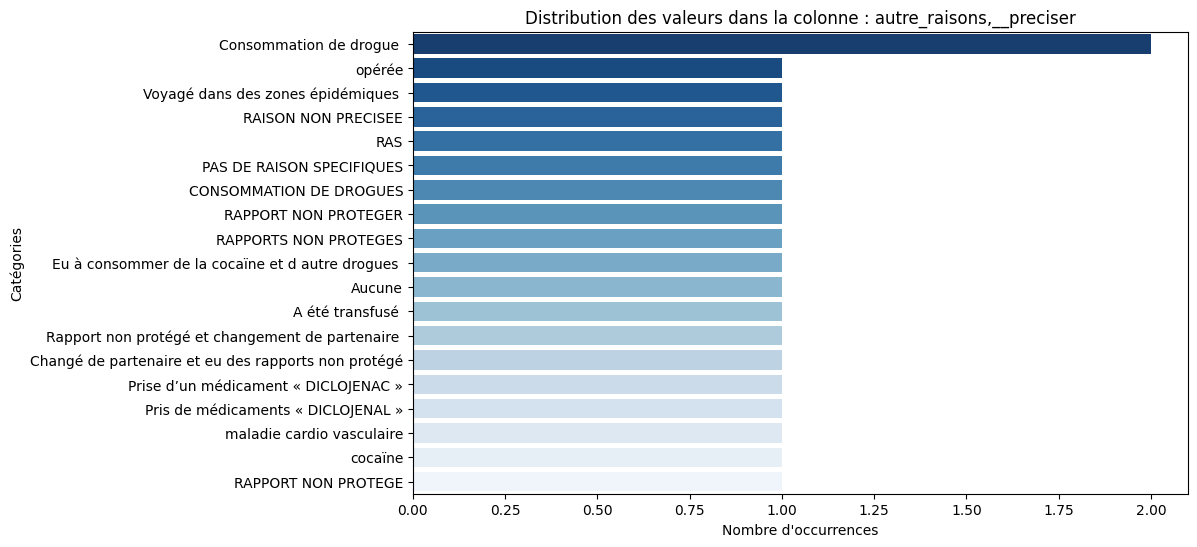


🏆 **Mode (valeur la plus fréquente) :** `Consommation de drogue `
🔵 Analyse des valeurs inhabituelles :
autre_raisons,__preciser
NaN                                   1895
Consommation de drogue                   2
opérée                                   1
RAISON NON PRECISEE                      1
RAS                                      1
PAS DE RAISON SPECIFIQUES                1
CONSOMMATION DE DROGUES                  1
RAPPORT NON PROTEGER                     1
RAPPORTS NON PROTEGES                    1
Voyagé dans des zones épidémiques        1
Name: count, dtype: int64

✅ **Examen terminé**



In [173]:
examiner_colonne(df, COLUMNS['AUTRE_RAISON'])

### **🔎 Observation**
- Les valeurs manquantes représentent les individus qui n'ont aucune raison
- Beaucoup de valeur identiques mais mal écrit

### 🛠️ **Traitements à effectuer**
- **Standardisation des valeurs** (ex. uniformiser la casse).  
- **Remplacement des valeurs manquantent  par *aucune***

In [174]:
# Remplacement de valeurs manquant par aucune
df[COLUMNS['AUTRE_RAISON']] = df[COLUMNS['AUTRE_RAISON']].fillna('aucune')

In [175]:
# Dictionnaire de correction
correction_mapping = {
    'consommation de drogue': 'consommation de drogues',
    'cocaïne': 'consommation de drogues',
    'eu à consommer de la cocaïne et d autre drogues': 'consommation de drogues',
    'rapport non proteger': 'rapport non protégé',
    'rapports non proteges': 'rapport non protégé',
    'rapport non protege': 'rapport non protégé',
    'ras': 'aucune',
    'pas de raison specifiques': 'aucune',
    'raison non precisee': 'non précisé',
    'changé de partenaire et eu des rapports non protégé': 'rapport non protégé et changement de partenaire',
    'pris de médicaments diclojenal ': 'prise de médicament diclojenac',
    'prise dun médicament diclojenac ': 'prise de médicament diclojenac',
    'drogues' : 'consommation de drogues',
    'aucune information': 'aucune',
    'pas d information sur son dossier': 'aucune',
    'ete traite par acupuncture': 'aucune',
}

# Standardisation des valeurs
df = standardiser_colonne(df, COLUMNS['AUTRE_RAISON'], correction_mapping)

✅ Colonne `autre_raisons,__preciser` standardisée avec succès !


In [176]:
examiner_colonne(df, COLUMNS['AUTRE_RAISON'])

🔎 **Examen de la colonne : `autre_raisons,__preciser`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 11
autre_raisons,__preciser
aucune                                             1898
consommation de drogues                               5
rapport non protégé                                   3
rapport non protégé et changement de partenaire       2
opérée                                                1
maladie cardio vasculaire                             1
pris de médicaments « diclojenal »                    1
prise d’un médicament « diclojenac »                  1
a été transfusé                                       1
voyagé dans des zones épidémiques                     1
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de ca

/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')



🏆 **Mode (valeur la plus fréquente) :** `aucune`
🔵 Analyse des valeurs inhabituelles :
autre_raisons,__preciser
aucune                                             1898
consommation de drogues                               5
rapport non protégé                                   3
rapport non protégé et changement de partenaire       2
opérée                                                1
maladie cardio vasculaire                             1
pris de médicaments « diclojenal »                    1
prise d’un médicament « diclojenac »                  1
a été transfusé                                       1
voyagé dans des zones épidémiques                     1
Name: count, dtype: int64

✅ **Examen terminé**



## 5.4- si_autres_raison_preciser

In [177]:
examiner_colonne(df, COLUMNS['SI_AUTRES_RAISON_PRECISER'])

🔎 **Examen de la colonne : `si_autres_raison_preciser`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 13 / 1915
- Proportion de valeurs manquantes : 99.32%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 13
si_autres_raison_preciser
Mal de nerf                                                            1
physiquement amorti                                                    1
maladie chronique, suivi medical regulier                              1
ANGINE DE LA POITRINE ,ARTÉRITE , INFARCTUS DU MYOCARDE                1
EU UNE ENDOSCOPIE ( FIBROSCOPIE,  GASTROSCOPIE, COLOSCOPIE .......)    1
MENOPOSÉ                                                               1
Consommation de drogue                                                 1
DROGUES                                                                1
Aucune information                                                     1
PAS D INFORMA

/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')



🏆 **Mode (valeur la plus fréquente) :** `ANGINE DE LA POITRINE ,ARTÉRITE , INFARCTUS DU MYOCARDE `
🔵 Analyse des valeurs inhabituelles :
si_autres_raison_preciser
NaN                                                                    1902
Mal de nerf                                                               1
physiquement amorti                                                       1
maladie chronique, suivi medical regulier                                 1
ANGINE DE LA POITRINE ,ARTÉRITE , INFARCTUS DU MYOCARDE                   1
EU UNE ENDOSCOPIE ( FIBROSCOPIE,  GASTROSCOPIE, COLOSCOPIE .......)       1
MENOPOSÉ                                                                  1
Consommation de drogue                                                    1
DROGUES                                                                   1
Aucune information                                                        1
Name: count, dtype: int64

✅ **Examen terminé**



### **🔎 Observation**
- Les valeurs manquantes représentent les individus qui n'ont aucune raison
- Beaucoup de valeur identiques mais mal écrit

### 🛠️ **Traitements à effectuer**
- **Standardisation des valeurs** (ex. uniformiser la casse).  
- **Remplacement des valeurs manquantent  par *aucune***

In [178]:
# Remplacement de valeurs manquant par aucune
df[COLUMNS['SI_AUTRES_RAISON_PRECISER']] = df[COLUMNS['SI_AUTRES_RAISON_PRECISER']].fillna('aucune')

In [179]:
# Dictionnaire de correction
correction_mapping = {
    'consommation de drogue': 'consommation de drogues',
    'cocaïne': 'consommation de drogues',
    'eu à consommer de la cocaïne et d autre drogues': 'consommation de drogues',
    'rapport non proteger': 'rapport non protégé',
    'rapports non proteges': 'rapport non protégé',
    'rapport non protege': 'rapport non protégé',
    'ras': 'aucune',
    'pas de raison specifiques': 'aucune',
    'raison non precisee': 'non précisé',
    'changé de partenaire et eu des rapports non protégé': 'rapport non protégé et changement de partenaire',
    'pris de médicaments diclojenal ': 'prise de médicament diclojenac',
    'prise dun médicament diclojenac ': 'prise de médicament diclojenac',
    'drogues' : 'consommation de drogues',
    'aucune information': 'aucune',
    'pas d information sur son dossier': 'aucune',
    'ete traite par acupuncture': 'aucune',
}

# Standardisation des valeurs
df = standardiser_colonne(df, COLUMNS['SI_AUTRES_RAISON_PRECISER'])

✅ Colonne `si_autres_raison_preciser` standardisée avec succès !


In [180]:
examiner_colonne(df, COLUMNS['AUTRE_RAISON'])

🔎 **Examen de la colonne : `autre_raisons,__preciser`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 11
autre_raisons,__preciser
aucune                                             1898
consommation de drogues                               5
rapport non protégé                                   3
rapport non protégé et changement de partenaire       2
opérée                                                1
maladie cardio vasculaire                             1
pris de médicaments « diclojenal »                    1
prise d’un médicament « diclojenac »                  1
a été transfusé                                       1
voyagé dans des zones épidémiques                     1
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de ca

/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')



🏆 **Mode (valeur la plus fréquente) :** `aucune`
🔵 Analyse des valeurs inhabituelles :
autre_raisons,__preciser
aucune                                             1898
consommation de drogues                               5
rapport non protégé                                   3
rapport non protégé et changement de partenaire       2
opérée                                                1
maladie cardio vasculaire                             1
pris de médicaments « diclojenal »                    1
prise d’un médicament « diclojenac »                  1
a été transfusé                                       1
voyagé dans des zones épidémiques                     1
Name: count, dtype: int64

✅ **Examen terminé**



## 5.4- Profession

🔎 **Examen de la colonne : `profession`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 529
profession
Etudiant (e)          283
Sans Emplois          214
Commerçant (e)        119
Mécanicien             61
Chauffeur              58
Eleve                  35
Enseignant (e)         32
Ménagère               32
Maçon                  30
Personnel de sante     30
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 150
- Présence de caractères spéciaux : 810



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


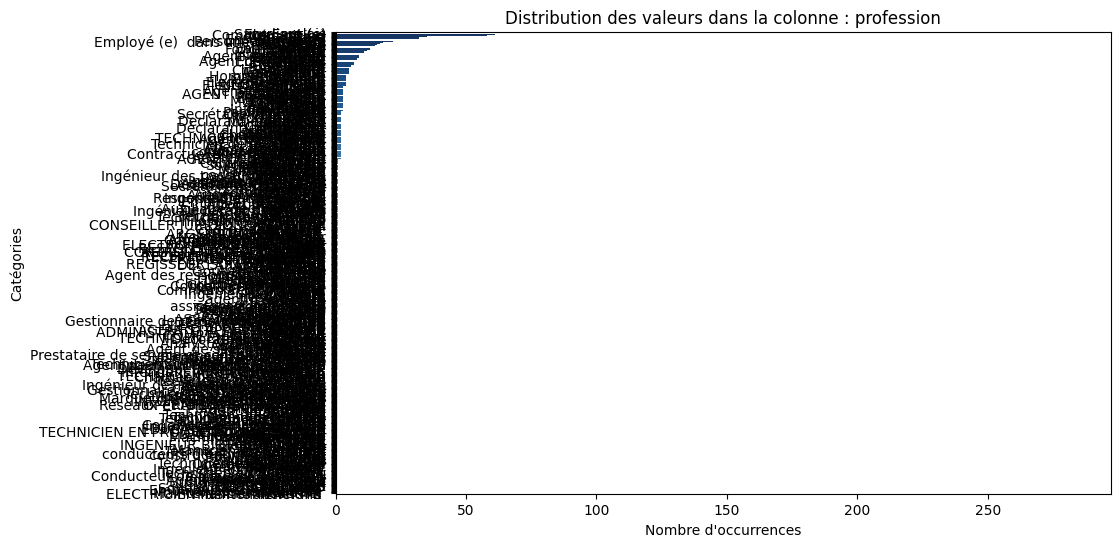


🏆 **Mode (valeur la plus fréquente) :** `Etudiant (e)`
🔵 Analyse des valeurs inhabituelles :
profession
Etudiant (e)          283
Sans Emplois          214
Commerçant (e)        119
Mécanicien             61
Chauffeur              58
Eleve                  35
Enseignant (e)         32
Ménagère               32
Maçon                  30
Personnel de sante     30
Name: count, dtype: int64

✅ **Examen terminé**



In [181]:
examiner_colonne(df, COLUMNS['PROFESSION'])

### **🔎 Observation**
- Nous avons pas de valeur manquante
- Beaucoup de valeur identiques mais mal écrit

### 🛠️ **Traitements à effectuer**
- **Standardisation des valeurs** (ex. uniformiser la casse).  

In [182]:
correction_mapping = {
    'eleve' : 'élève',
    'elève' : 'élève',
    'etudiant': 'étudiant',
    'etudiant e': 'étudiant',
    'commerçant e': 'commerçant',
    'enseignant e': 'enseignant',
    'employé e dans une entreprise': 'employé dans une entreprise',
    'ingenieur': 'ingénieur',
    'agent de securité' : 'agent de sécurité',
    'agent de securite' : 'agent de sécurité',
    'electrotechnicien': 'électrotechnicien',
    'agent dentretien' : 'agent d\'entretien',
    'moto taximan': 'moto-taximan',
    'bensikineur': 'moto-taximan',
    'motoman': 'moto-taximan',
    'r a s': 'pas précisé',
    'pas precisé': 'pas précisé',
    'non precise': 'pas précisé',
    'pas précise': 'pas précisé',
    'pas mentionné': 'pas précisé',
    'pas precise': 'pas précisé',
    'menagere': 'ménagere',
    'secretaire': 'sécretaire',
    'agent dappui pharmicie': 'agent d\'appui pharmicie',
    'electricien plombier': 'électricien plombier',
    'decorateur baptiment': 'décorateur bâtiment',
    'medecin': 'médecin',
    'technicien en metallurgie': 'technicien en métallurgie',
    'educateur des enfants': 'éducateur des enfants',
    'technicien mechanique' :  'technicien mecanique',
    'technicienne de surface' :  'technicien de surface',
    'assurent': 'assurant',
    'electro mecanicien' : 'électromécanicien',
    'machiniste- électricien': 'machiniste-électricien',
    'sculpteurs': 'sculpteur',
    'macon': 'maçon',
    'electricien instrumentiste': 'électricien instrumentiste',
    'pleg': 'enseignant'
}

df = standardiser_colonne(df, COLUMNS['PROFESSION'], correction_mapping)

✅ Colonne `profession` standardisée avec succès !


## 5.4- Situation Matrimoniale

🔎 **Examen de la colonne : `situation_matrimoniale_(sm)`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 4
situation_matrimoniale_(sm)
Célibataire     1414
Marié (e)        479
Divorcé(e)        15
veuf (veuve)       7
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 1915



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


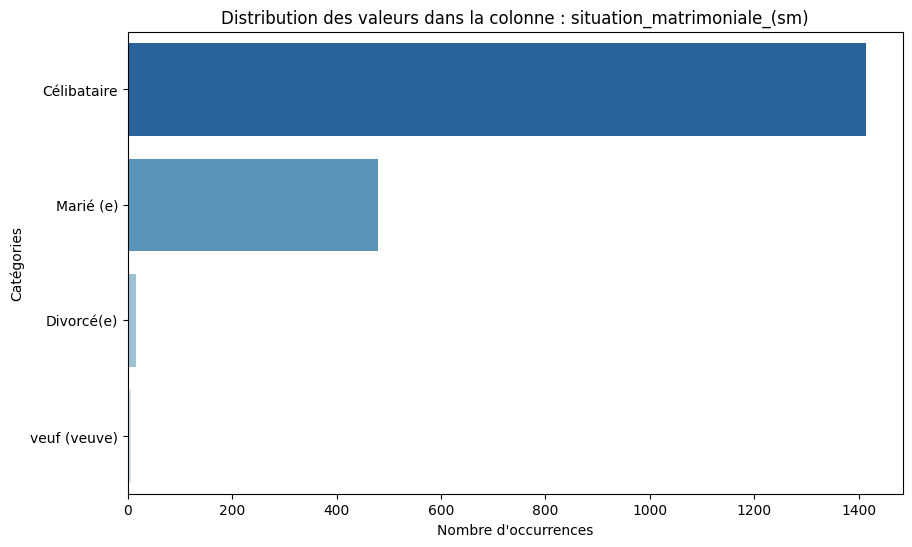


🏆 **Mode (valeur la plus fréquente) :** `Célibataire`
🔵 Analyse des valeurs inhabituelles :
situation_matrimoniale_(sm)
Célibataire     1414
Marié (e)        479
Divorcé(e)        15
veuf (veuve)       7
Name: count, dtype: int64

✅ **Examen terminé**



In [183]:
examiner_colonne(df, COLUMNS['SITUATION_MATRIMONIALE'])

## 5.5- Genre

🔎 **Examen de la colonne : `genre`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 2
genre
Homme    1723
Femme     192
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 0



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


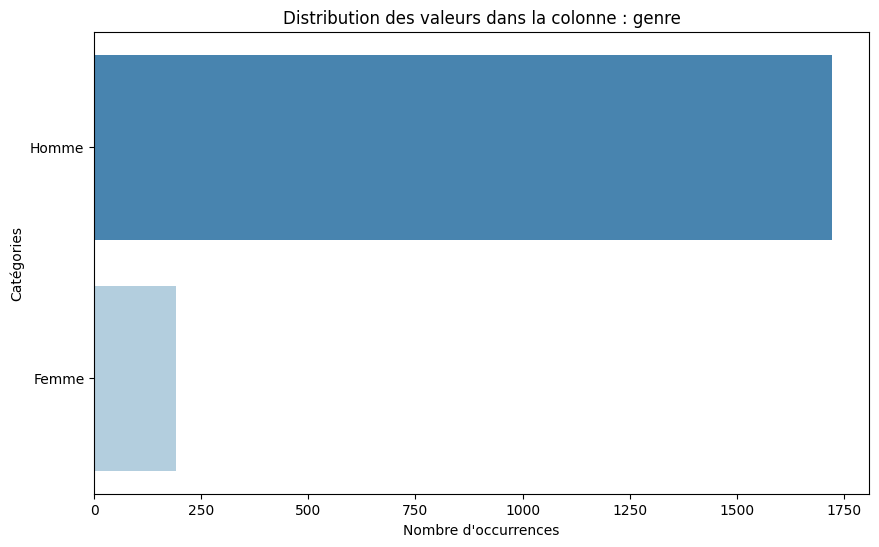


🏆 **Mode (valeur la plus fréquente) :** `Homme`
🔵 Analyse des valeurs inhabituelles :
genre
Homme    1723
Femme     192
Name: count, dtype: int64

✅ **Examen terminé**



In [184]:
examiner_colonne(df, COLUMNS['GENRE'])

## 5.6- Niveau d'étude

🔎 **Examen de la colonne : `niveau_d_etude`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 5
niveau_d_etude
Secondaire       697
Universitaire    684
Pas Précisé      359
Primaire         133
Aucun             42
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 359



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


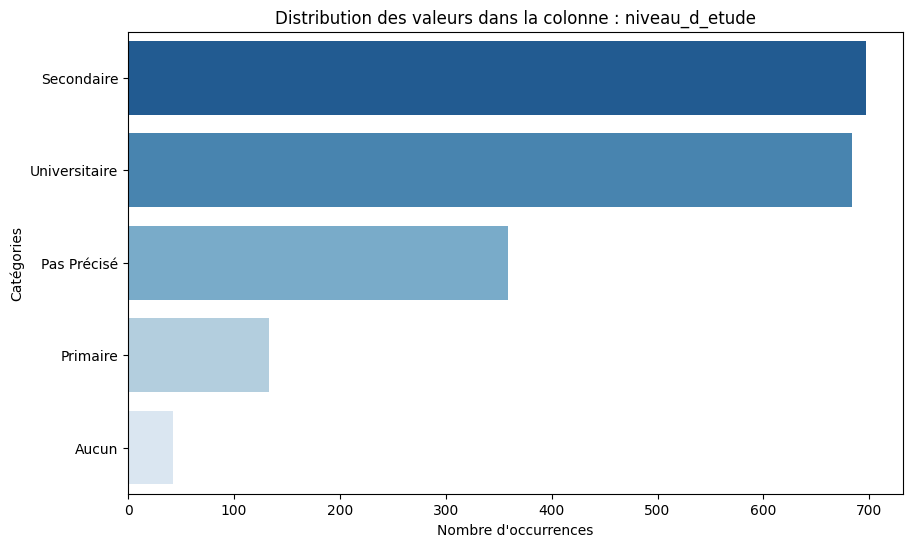


🏆 **Mode (valeur la plus fréquente) :** `Secondaire`
🔵 Analyse des valeurs inhabituelles :
niveau_d_etude
Secondaire       697
Universitaire    684
Pas Précisé      359
Primaire         133
Aucun             42
Name: count, dtype: int64

✅ **Examen terminé**



In [185]:
examiner_colonne(df, COLUMNS['NIVEAU_ETUDE'])

## 5.7- Taille

🔎 **Examen de la colonne : `taille`**

📋 Type de colonne détecté : **Quantitative**

📋 Informations générales :
- Type de données : float64
- Nombre total de valeurs non-nulles : 62 / 1915
- Proportion de valeurs manquantes : 96.76%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 24
taille
170.0    8
175.0    5
167.0    5
172.0    5
168.0    4
178.0    4
176.0    3
177.0    3
173.0    3
182.0    2
Name: count, dtype: int64

📊 Statistiques descriptives :
count     62.000000
mean     172.596774
std        7.023286
min      158.000000
25%      168.000000
50%      172.000000
75%      177.000000
max      192.000000
Name: taille, dtype: float64


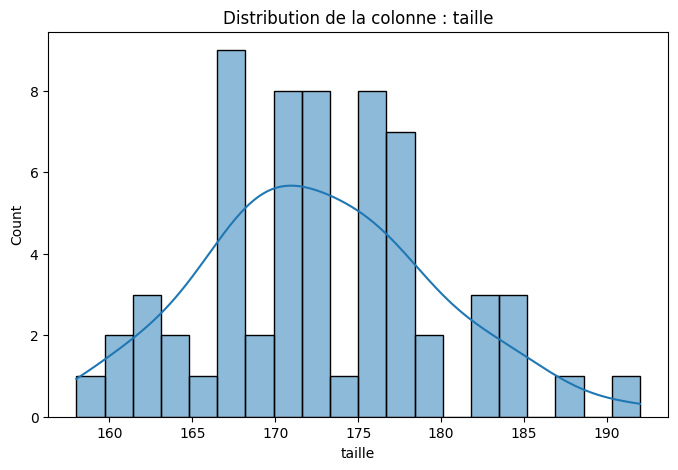

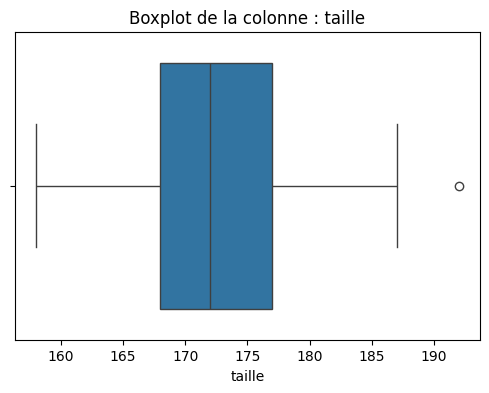

🔵 Analyse des valeurs inhabituelles :
taille
NaN      1853
170.0       8
172.0       5
175.0       5
167.0       5
168.0       4
178.0       4
177.0       3
173.0       3
176.0       3
Name: count, dtype: int64

🚨 Outliers détectés :
- Nombre d'outliers détectés : 1

✅ **Examen terminé**



In [186]:
examiner_colonne(df, COLUMNS['TAILLE'])

### **🔎 Observation**
- Nous avons plus de **95%** de valeur manquante, donc cette colonne est peu informative

### 🛠️ **Traitements à effectuer**
- Suppression de cette colonne

In [187]:
# suppresion de colonne
df.drop(COLUMNS['TAILLE'], axis=1, inplace=True)

## 5.8- Poids

🔎 **Examen de la colonne : `poids`**

📋 Type de colonne détecté : **Quantitative**

📋 Informations générales :
- Type de données : float64
- Nombre total de valeurs non-nulles : 106 / 1915
- Proportion de valeurs manquantes : 94.46%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 40
poids
75.0    10
76.0     7
70.0     7
85.0     6
72.0     5
60.0     5
65.0     5
80.0     4
90.0     4
69.0     4
Name: count, dtype: int64

📊 Statistiques descriptives :
count    106.000000
mean      77.481132
std       12.467276
min       55.000000
25%       69.250000
50%       75.000000
75%       85.000000
max      120.000000
Name: poids, dtype: float64


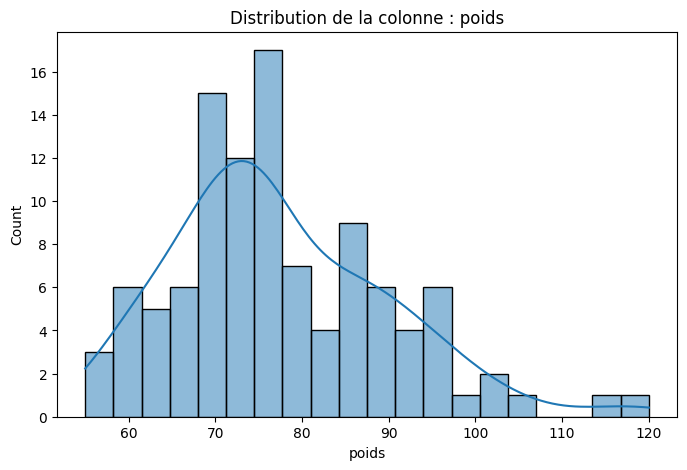

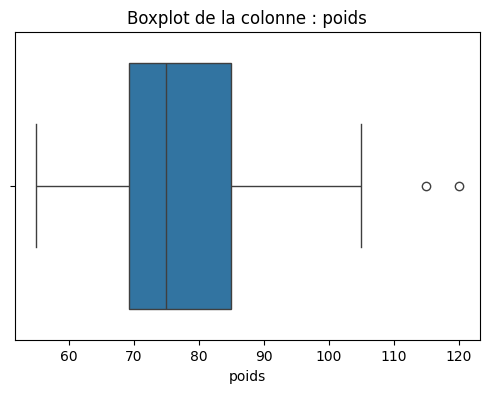

🔵 Analyse des valeurs inhabituelles :
poids
NaN     1809
75.0      10
70.0       7
76.0       7
85.0       6
65.0       5
60.0       5
72.0       5
90.0       4
69.0       4
Name: count, dtype: int64

🚨 Outliers détectés :
- Nombre d'outliers détectés : 2

✅ **Examen terminé**



In [188]:
examiner_colonne(df, COLUMNS['POIDS'])

### **🔎 Observation**
- Nous avons plus de **90%** de valeur manquante, donc cette colonne est peu informative

### 🛠️ **Traitements à effectuer**
- Suppression de cette colonne

In [189]:
# suppresion de colonne
df.drop(COLUMNS['POIDS'], axis=1, inplace=True)

## 5.9- Nationalité

🔎 **Examen de la colonne : `nationalite`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 15
nationalite
Camerounaise      1858
R A S               29
R A S                8
RAS                  4
Centrafricaine       3
Malien               2
R.A.S                2
 R A S               2
Malienne             1
Non precisé          1
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 10
- Présence de caractères spéciaux : 3



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


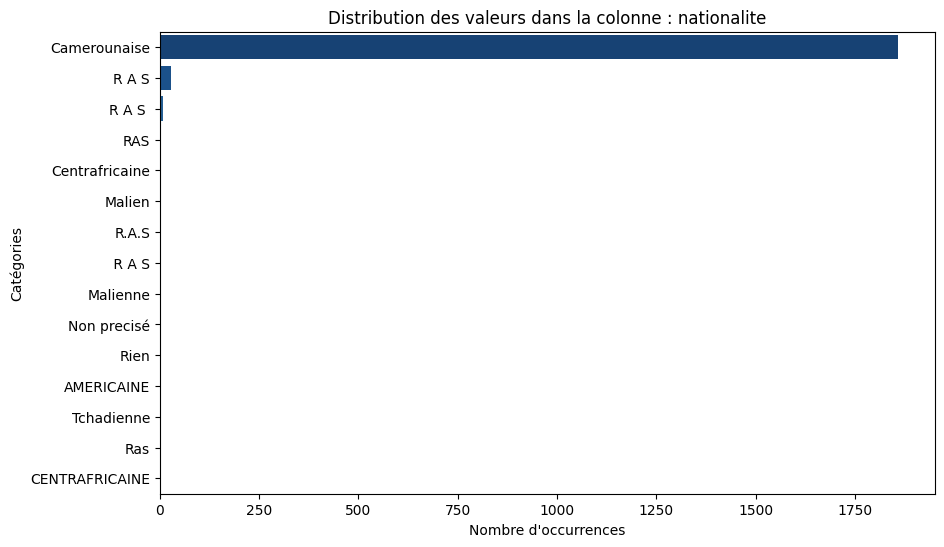


🏆 **Mode (valeur la plus fréquente) :** `Camerounaise`
🔵 Analyse des valeurs inhabituelles :
nationalite
Camerounaise      1858
R A S               29
R A S                8
RAS                  4
Centrafricaine       3
Malien               2
R.A.S                2
 R A S               2
Malienne             1
Non precisé          1
Name: count, dtype: int64

✅ **Examen terminé**



In [190]:
examiner_colonne(df, COLUMNS['NATIONALITE'])

In [191]:
df['nationalite'].value_counts()

nationalite
Camerounaise      1858
R A S               29
R A S                8
RAS                  4
Centrafricaine       3
Malien               2
R.A.S                2
 R A S               2
Malienne             1
Non precisé          1
Rien                 1
AMERICAINE           1
Tchadienne           1
Ras                  1
CENTRAFRICAINE       1
Name: count, dtype: int64

### **🔎 Interprétation**
- Beaucoup de valeur identique mais mal écrite 

### 🛠️ **Traitements à effectuer**
- **Standardisation des valeurs** (ex. uniformiser la casse).  

In [192]:
correction_mapping = {
    'ras' : 'pas précisé',
    'r a s' : 'pas précisé',
    'non precisé' : 'pas précisé',
    'rien' : 'pas précisé',
    'malien' : 'malienne',
}

# Standardisation des valeurs
df = standardiser_colonne(df, COLUMNS['NATIONALITE'], correction_mapping)

✅ Colonne `nationalite` standardisée avec succès !


🔎 **Examen de la colonne : `nationalite`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 7
nationalite
camerounaise      1858
pas précisé         46
centrafricaine       4
malienne             3
r.a.s                2
americaine           1
tchadienne           1
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 48



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


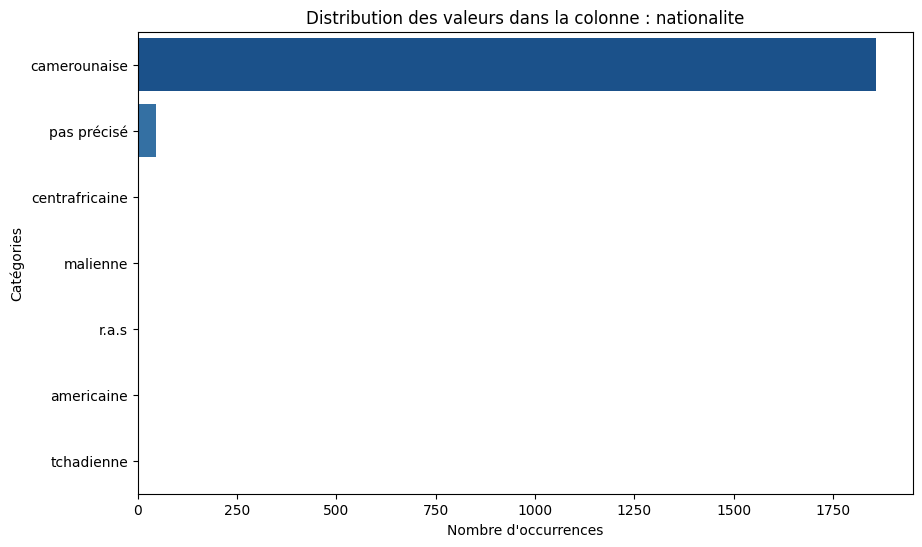


🏆 **Mode (valeur la plus fréquente) :** `camerounaise`
🔵 Analyse des valeurs inhabituelles :
nationalite
camerounaise      1858
pas précisé         46
centrafricaine       4
malienne             3
r.a.s                2
americaine           1
tchadienne           1
Name: count, dtype: int64

✅ **Examen terminé**



In [193]:
examiner_colonne(df, COLUMNS['NATIONALITE'])

## 5.10- Réligion 

🔎 **Examen de la colonne : `religion`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 37
religion
Chretien (Catholique)       738
Pas Précisé                 616
Chretien (Protestant )      346
Musulman                     82
Chretien (Ne de nouveau)     44
Non-croyant                  20
Traditionaliste               8
Chrétien non précisé          8
Chretien                      8
Pentecotiste                  3
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 2
- Présence de caractères spéciaux : 1788



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


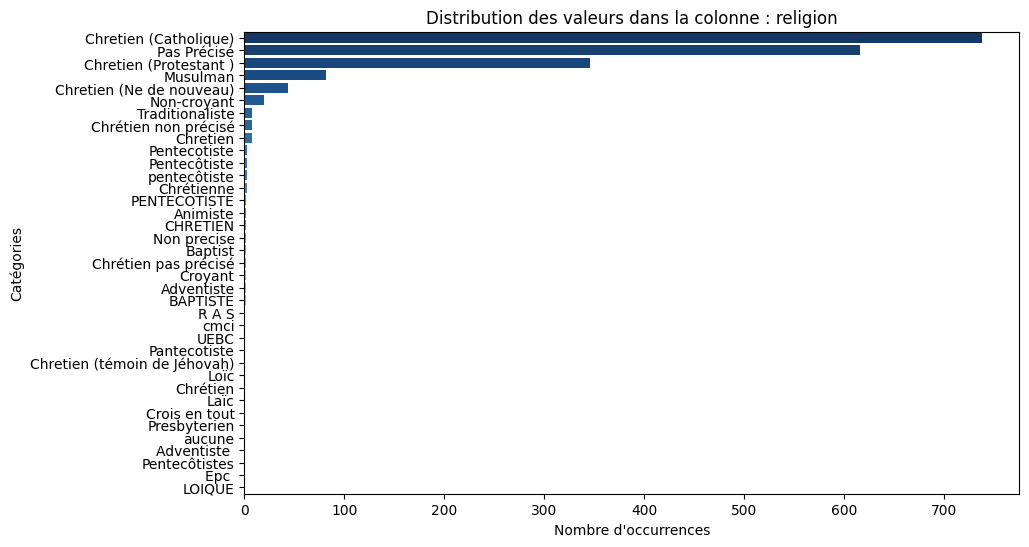


🏆 **Mode (valeur la plus fréquente) :** `Chretien (Catholique)`
🔵 Analyse des valeurs inhabituelles :
religion
Chretien (Catholique)       738
Pas Précisé                 616
Chretien (Protestant )      346
Musulman                     82
Chretien (Ne de nouveau)     44
Non-croyant                  20
Traditionaliste               8
Chrétien non précisé          8
Chretien                      8
Pentecotiste                  3
Name: count, dtype: int64

✅ **Examen terminé**



In [194]:
examiner_colonne(df, COLUMNS['RELIGION'])

### **🔎 Observation**
- Beaucoup de valeur identique mais mal écrite 

### 🛠️ **Traitements à effectuer**
- **Standardisation des valeurs** (ex. uniformiser la casse).  

In [195]:
correction_mapping = {
    'ras' : 'pas précisé',
    'r a s' : 'pas précisé',
    'non precise' : 'pas précisé',
    'croyant' : 'pas précisé',
    'loïc' : 'pas précisé',
    'laïc' : 'pas précisé',
    'loique' : 'pas précisé',
    'chretien catholique': 'chrétien(catholique)',
    'chretien protestant': 'chrétien(protestant)',
    'cmci': 'chrétien(protestant)',
    'baptist': 'chrétien(protestant)',
    'baptiste': 'chrétien(protestant)',
    'chretien protestant ': 'chrétien(protestant)',
    'uebc': 'chrétien(protestant)',
    'epc': 'chrétien(protestant)',
    'adventiste': 'chrétien(protestant)',
    'presbyterien': 'chrétien(protestant)',
    'chretien ne de nouveau': 'chrétien(né de nouveau)',
    'chretien': 'chrétien(non précisé)',
    'chrétienne': 'chrétien(non précisé)',
    'chrétien': 'chrétien(non précisé)',
    'chrétien pas précisé': 'chrétien(non précisé)',
    'chrétien non précisé': 'chrétien(non précisé)',
    'pentecotiste': 'chrétien(pentecôtiste)',
    'pentecôtiste': 'chrétien(pentecôtiste)',
    'pentecotiste': 'chrétien(pentecôtiste)',
    'pantecotiste': 'chrétien(pentecôtiste)',
    'pentecôtistes': 'chrétien(pentecôtiste)',
    'chretien témoin de jéhovah': 'chrétien(témoin de jéhovah)',    
    'chretien témoin de jéhovah': 'chrétien(témoin de jéhovah)',    
    'aucune': 'athée',
    'non-croyant': 'athée',
    'crois en tout': 'crédule',
}

# Standardisation des valeurs
df = standardiser_colonne(df, COLUMNS['RELIGION'], correction_mapping)

✅ Colonne `religion` standardisée avec succès !


🔎 **Examen de la colonne : `religion`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 13
religion
chretien (catholique)       738
pas précisé                 624
chretien (protestant )      346
musulman                     82
chretien (ne de nouveau)     44
chrétien(non précisé)        24
athée                        21
chrétien(pentecôtiste)       13
chrétien(protestant)         11
traditionaliste               8
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 1823



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


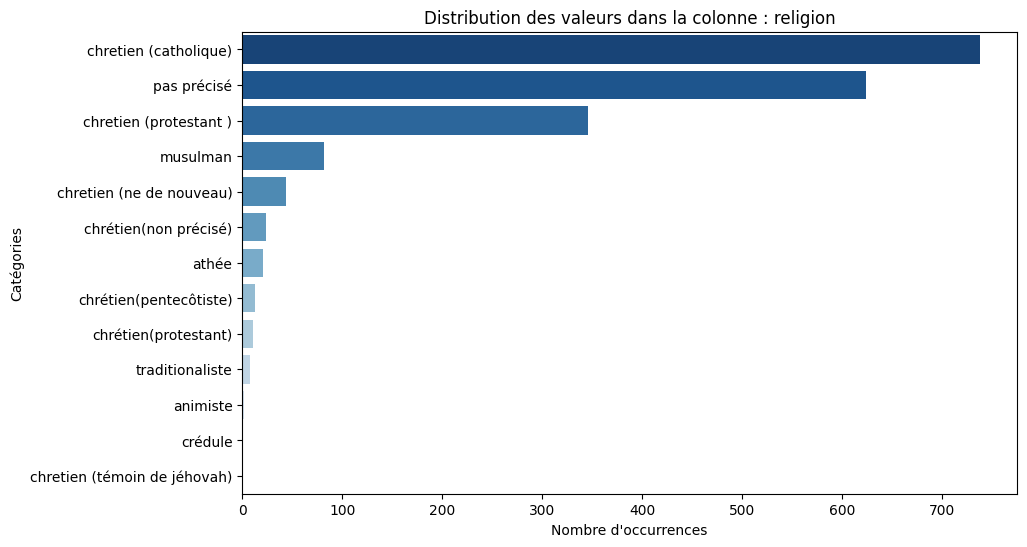


🏆 **Mode (valeur la plus fréquente) :** `chretien (catholique)`
🔵 Analyse des valeurs inhabituelles :
religion
chretien (catholique)       738
pas précisé                 624
chretien (protestant )      346
musulman                     82
chretien (ne de nouveau)     44
chrétien(non précisé)        24
athée                        21
chrétien(pentecôtiste)       13
chrétien(protestant)         11
traditionaliste               8
Name: count, dtype: int64

✅ **Examen terminé**



In [196]:
examiner_colonne(df, COLUMNS['RELIGION'])

## 5.11- Date de remplissage

🔎 **Examen de la colonne : `date_de_remplissage`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1913 / 1915
- Proportion de valeurs manquantes : 0.10%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 292
date_de_remplissage
2019-08-06 00:00:00    40
2019-08-14 00:00:00    39
2019-10-14 00:00:00    30
2019-11-01 00:00:00    25
2019-10-02 00:00:00    22
2019-11-04 00:00:00    22
2019-01-25 00:00:00    21
2019-02-06 00:00:00    20
2019-10-11 00:00:00    20
2019-01-23 00:00:00    19
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 1895
- Présence de caractères spéciaux : 20



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


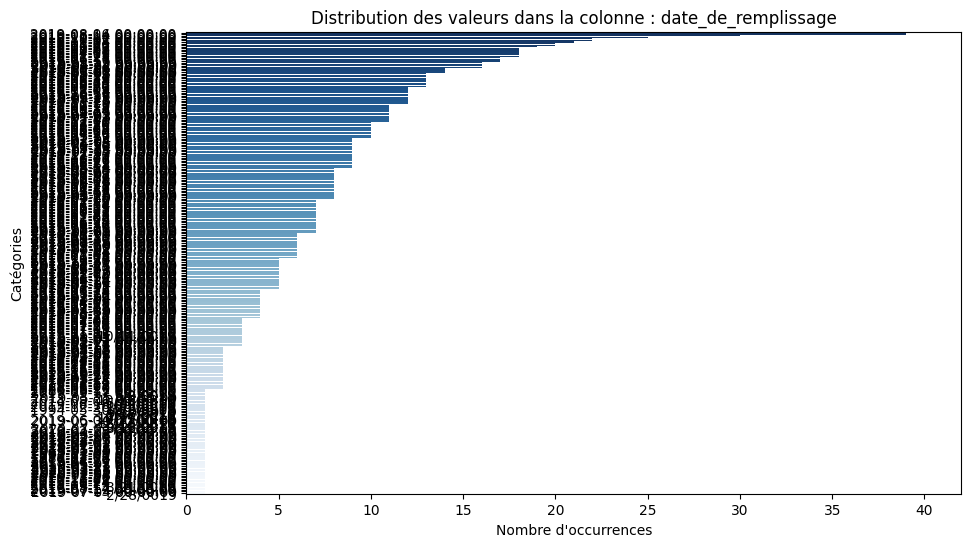


🏆 **Mode (valeur la plus fréquente) :** `2019-08-06 00:00:00`
🔵 Analyse des valeurs inhabituelles :
date_de_remplissage
2019-08-06 00:00:00    40
2019-08-14 00:00:00    39
2019-10-14 00:00:00    30
2019-11-01 00:00:00    25
2019-10-02 00:00:00    22
2019-11-04 00:00:00    22
2019-01-25 00:00:00    21
2019-02-06 00:00:00    20
2019-10-11 00:00:00    20
2019-01-23 00:00:00    19
Name: count, dtype: int64

✅ **Examen terminé**



In [197]:
examiner_colonne(df, COLUMNS['DATE_DE_REMPLISSAGE'])

### **🔎 Observation**
- Une observation clé est que les séparateurs utilisés dans les dates varient, ce qui crée une incohérence dans le formatage.  
- Il est donc essentiel d'harmoniser ces formats pour garantir une analyse fluide et précise des données. 
- certaines années de remplissage sont indiquées comme 0019, ce qui semble être une anomalie. Étant donné que les années prédominantes dans les données sont 2019.   

### 🛠️ **Traitements à effectuer**
- Harmosisation des formats.  
- Nous supposons qu'il s'agit d'erreurs de saisie, et ces valeurs devraient être corrigées pour refléter 2019.  
- conversion des données en format datetime, afin de garantir une manipulation cohérente des dates et permettre une analyse chronologique plus précise. 
- Traitement personnaliser des valeurs manquantes s'il n'y a 

In [198]:
# Correction l'année "0019"
df = corriger_valeurs(df, COLUMNS['DATE_DE_REMPLISSAGE'], motif="0019", remplacement="2019")

In [199]:
# Harmonisation des formats
df[COLUMNS['DATE_DE_REMPLISSAGE']] = format_date(df[COLUMNS['DATE_DE_REMPLISSAGE']])

In [200]:
# Conversion
df[COLUMNS['DATE_DE_REMPLISSAGE']] = pd.to_datetime(df[COLUMNS['DATE_DE_REMPLISSAGE']], errors='coerce')

In [201]:
# Nombre de valeur manquante
df[COLUMNS['DATE_DE_REMPLISSAGE']].isnull().sum()

2

In [202]:
# Examination personnalisé pour évaluer la meilleur stratégie pour les remplacer de manière cohérente et pertinente
# Extraction de ses voisins
resultat = extraire_voisins_avant_valeurs_manquantes(df, COLUMNS['DATE_DE_REMPLISSAGE'], marge=5)
resultat

date_de_remplissage    date_de_naissance niveau_d_etude  genre  \
1543          2020-03-13  2003-07-25 00:00:00  Universitaire  Homme   
1544          2020-03-18  1998-11-17 00:00:00  Universitaire  Homme   
1545          2020-03-21  1987-09-30 00:00:00     Secondaire  Homme   
1546          2020-07-01  1998-01-10 00:00:00     Secondaire  Homme   
1547          2020-07-02  1985-01-01 00:00:00    Pas Précisé  Homme   
1548                 NaT  1990-03-22 00:00:00     Secondaire  Homme   
1549                 NaT  2020-11-23 00:00:00     Secondaire  Homme   

     situation_matrimoniale_(sm)       profession arrondissement_de_residence  \
1543                 Célibataire     etudiant (e)                    Douala 3   
1544                 Célibataire     etudiant (e)                    Douala 5   
1545                 Célibataire   commerçant (e)       Douala (Non précisé )   
1546                 Célibataire          vitrier                    Douala 3   
1547                   Marié (e)        chauffeur                 non precisé   
1548                 Célibataire  homme d'affaire                    Douala 5   
1549                 Célibataire       commercant                    Douala 5   

     quartier_de_residence   nationalite                religion  \
1543                   Ari  camerounaise  chretien (protestant )   
1544                Kotto   camerounaise   chretien (catholique)   
1545                  Pk12  camerounaise   chretien (catholique)   
1546                 YASSA  camerounaise             pas précisé   
1547           non precisé  camerounaise   chretien (catholique)   
1548                LOGPOM  camerounaise   chretien (catholique)   
1549          Ange raphael  camerounaise   chretien (catholique)   

     a_t_il_elle_deja_donne_le_sang si_oui_preciser_la_date_du_dernier_don  \
1543                            Non                                    NaN   
1544                            Non                                    NaN   
1545                            Non                                    NaN   
1546                            Non                                    NaN   
1547                            Oui                    2018-01-01 00:00:00   
1548                            Non                                    NaN   
1549                            Oui                    2020-02-11 00:00:00   

     taux_d_hemoglobine           eligibilite_au_don  \
1543                NaN  temporairement non-eligible   
1544                NaN                     eligible   
1545               14.5                     eligible   
1546               15.6                     eligible   
1547               13.8                     eligible   
1548               13.9  définitivement non-eligible   
1549               13.4                     eligible   

     raison_indisponibilité__[est_sous_anti-biothérapie__]  \
1543                                                non      
1544                                                non      
1545                                                non      
1546                                                non      
1547                                                non      
1548                                                non      
1549                                                non      

     raison_indisponibilité__[taux_d’hémoglobine_bas_]  \
1543                                               oui   
1544                                               non   
1545                                               non   
1546                                               non   
1547                                               non   
1548                                               non   
1549                                               non   

     raison_indisponibilité__[date_de_dernier_don_<_3_mois_]  \
1543                                                non        
1544                                                non        
1545          

**🔎 Interprétation** :
- En analysant les dates manquantes dans la colonne 'Date de remplissage' ainsi que les 2 valeurs qui les précèdent, j'ai remarqué une logique claire dans leur progression. 
- Les dates semblent croître d'un jour à chaque étape. Il serait donc plus cohérent et pertinent de suivre cette logique pour remplacer les valeurs manquantes

In [203]:
# Remplacement des valeurs manquantes par cette logique
df = remplacer_dates_manquantes(df, COLUMNS['DATE_DE_REMPLISSAGE'])

🔎 **Examen de la colonne : `date_de_remplissage`**

📋 Type de colonne détecté : **Date**

📋 Informations générales :
- Type de données : datetime64[ns]
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 279
date_de_remplissage
2019-08-06    40
2019-08-14    39
2019-10-14    31
2019-11-01    25
2019-10-11    23
2019-11-04    22
2019-10-02    22
2019-01-25    21
2019-02-06    20
2019-01-23    19
Name: count, dtype: int64

🔵 Analyse des valeurs inhabituelles :
date_de_remplissage
2019-08-06    40
2019-08-14    39
2019-10-14    31
2019-11-01    25
2019-10-11    23
2019-11-04    22
2019-10-02    22
2019-01-25    21
2019-02-06    20
2019-01-23    19
Name: count, dtype: int64

🗓️ Analyse temporelle de la colonne date :
- Date la plus ancienne : 1977-12-25 00:00:00
- Date la plus récente : 2020-10-12 00:00:00


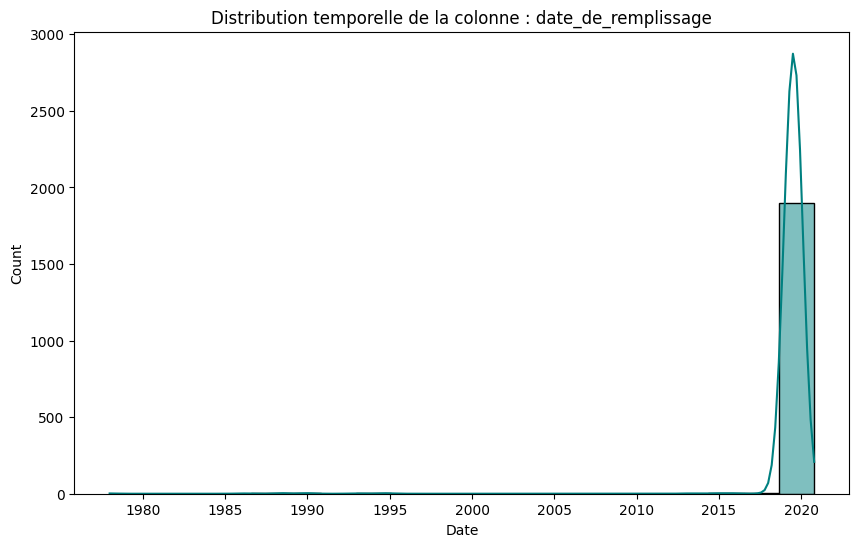

🔎 Répartition par année :
date_de_remplissage
1977       1
1986       1
1988       2
1989       1
1990       1
1992       1
1994       1
1995       1
2013       1
2014       1
2015       2
2018       4
2019    1886
2020      12
Name: count, dtype: int64

🔎 Répartition par mois (tous les mois confondus) :
date_de_remplissage
1     204
2     144
3     138
4     161
5      92
6     127
7     145
8     204
9     180
10    246
11    144
12    130
Name: count, dtype: int64
✅ **Examen terminé**



In [204]:
examiner_colonne(df, COLUMNS['DATE_DE_REMPLISSAGE'])

## 5.12- Date de naissance

🔎 **Examen de la colonne : `date_de_naissance`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 1618
date_de_naissance
1/1/0001               15
1995-11-26 00:00:00     5
1990-01-01 00:00:00     5
1996-05-29 00:00:00     5
1994-01-01 00:00:00     4
2000-01-01 00:00:00     4
1985-05-12 00:00:00     4
1996-01-01 00:00:00     4
1995-06-14 00:00:00     3
1994-10-25 00:00:00     3
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 1895
- Présence de caractères spéciaux : 20



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


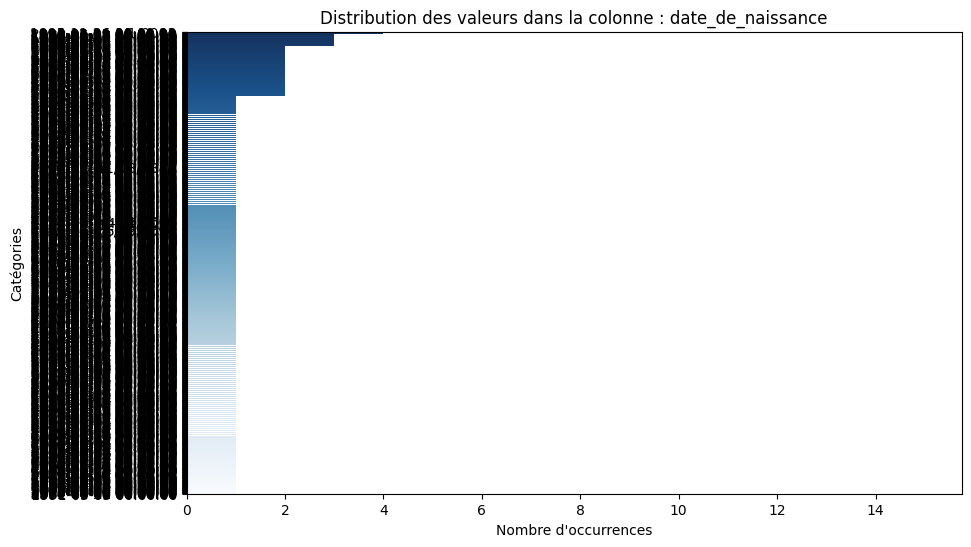


🏆 **Mode (valeur la plus fréquente) :** `1/1/0001`
🔵 Analyse des valeurs inhabituelles :
date_de_naissance
1/1/0001               15
1995-11-26 00:00:00     5
1990-01-01 00:00:00     5
1996-05-29 00:00:00     5
1994-01-01 00:00:00     4
2000-01-01 00:00:00     4
1985-05-12 00:00:00     4
1996-01-01 00:00:00     4
1995-06-14 00:00:00     3
1994-10-25 00:00:00     3
Name: count, dtype: int64

✅ **Examen terminé**



In [205]:
examiner_colonne(df, COLUMNS['DATE_DE_NAISSANCE'])

In [206]:
# visualisation des dates separés avec des tirets
# Filtrer les lignes où le séparateur est '/'
df[df[COLUMNS['DATE_DE_NAISSANCE']].str.contains('/', na=False)]

date_de_remplissage date_de_naissance niveau_d_etude  genre  \
1053          2019-09-19        11/18/1882          Aucun  Homme   
1760          2019-08-20         4/16/0093  Universitaire  Homme   
1764          2019-08-26          1/1/0000    Pas Précisé  Femme   
1780          2019-08-14        12/28/0080  Universitaire  Homme   
1787          2019-08-14         5/19/0096     Secondaire  Homme   
1811          2019-08-13          1/1/0001    Pas Précisé  Femme   
1840          2019-12-23          1/1/0001    Pas Précisé  Homme   
1852          2019-12-06          1/1/0001    Pas Précisé  Femme   
1856          2019-09-10          1/1/0001  Universitaire  Homme   
1863          2019-10-22          1/1/0001  Universitaire  Femme   
1869          2019-10-15          1/1/0001       Primaire  Homme   
1871          2019-10-23          1/1/0001     Secondaire  Homme   
1874          2019-03-26          1/1/0001  Universitaire  Femme   
1875          2019-03-29          1/1/0001  Universitaire  Homme   
1876          2019-08-18          1/1/0001    Pas Précisé  Homme   
1880          2019-03-28          1/1/0001    Pas Précisé  Homme   
1881          2019-03-27          1/1/0001    Pas Précisé  Homme   
1883          2019-03-27          1/1/0001    Pas Précisé  Homme   
1884          2019-03-26          1/1/0001     Secondaire  Homme   
1885          2019-03-26          1/1/0001    Pas Précisé  Homme   

     situation_matrimoniale_(sm)              profession  \
1053                   Marié (e)               sculpteur   
1760                 Célibataire       électrotechnicien   
1764                 Célibataire                     ras   
1780                   Marié (e)             jeune cadre   
1787                 Célibataire                      sp   
1811                 Célibataire                ménagere   
1840                 Célibataire                securite   
1852                   Marié (e)          commerçant (e)   
1856                 Célibataire            etudiant (e)   
1863                 Célibataire            etudiant (e)   
1869                 Célibataire               cuisinier   
1871                   Marié (e)               carreleur   
1874                 Célibataire       prepose de marque   
1875                 Célibataire       agent de sécurité   
1876                 Célibataire                   maçon   
1880                  Divorcé(e)  technicien en batiment   
1881                 Célibataire              mecanicien   
1883                 Célibataire                   maçon   
1884                 Célibataire       agent de sécurité   
1885                   Marié (e)             electricien   

     arrondissement_de_residence      quartier_de_residence     nationalite  \
1053       Douala (Non précisé )                     DOUALA    camerounaise   
1760                    Douala 3  Douala newtown  Aéroport     camerounaise   
1764                         Ras                        Ras    camerounaise   
1780                    Douala 5               Binamoussadi    camerounaise   
1787       Douala (Non précisé )                      Yassa    camerounaise   
1811               DCANKONGMONDO                        RAS    camerounaise   
1840                    Douala 5                    NDOGBOM     pas précisé   
1852                    Douala 3                   CONGEFAR  centrafricaine   
1856                    Douala 3                     JAPOMA     pas précisé   
1863       Douala (Non précisé )      ANGE RAPHAEL CAMPUS 2    camerounaise   
1869       Douala (Non précisé )                 NKONGMONDO    camerounaise   
1871       Douala (Non précisé )                        RAS    camerounaise   
1874       Douala (Non précisé )                     DOUALA    camerounaise   
1875       Douala (Non précisé )                       RAS     camerounaise   
1876       Douala (Non précisé )             BONATEKI DEIDO    camerounaise   
1880       Douala (Non précisé )                   

In [207]:
df[df[COLUMNS['DATE_DE_NAISSANCE']].str.contains('00', na=False)]

date_de_remplissage date_de_naissance niveau_d_etude  genre  \
1760          2019-08-20         4/16/0093  Universitaire  Homme   
1764          2019-08-26          1/1/0000    Pas Précisé  Femme   
1780          2019-08-14        12/28/0080  Universitaire  Homme   
1787          2019-08-14         5/19/0096     Secondaire  Homme   
1811          2019-08-13          1/1/0001    Pas Précisé  Femme   
1840          2019-12-23          1/1/0001    Pas Précisé  Homme   
1852          2019-12-06          1/1/0001    Pas Précisé  Femme   
1856          2019-09-10          1/1/0001  Universitaire  Homme   
1863          2019-10-22          1/1/0001  Universitaire  Femme   
1869          2019-10-15          1/1/0001       Primaire  Homme   
1871          2019-10-23          1/1/0001     Secondaire  Homme   
1874          2019-03-26          1/1/0001  Universitaire  Femme   
1875          2019-03-29          1/1/0001  Universitaire  Homme   
1876          2019-08-18          1/1/0001    Pas Précisé  Homme   
1880          2019-03-28          1/1/0001    Pas Précisé  Homme   
1881          2019-03-27          1/1/0001    Pas Précisé  Homme   
1883          2019-03-27          1/1/0001    Pas Précisé  Homme   
1884          2019-03-26          1/1/0001     Secondaire  Homme   
1885          2019-03-26          1/1/0001    Pas Précisé  Homme   

     situation_matrimoniale_(sm)              profession  \
1760                 Célibataire       électrotechnicien   
1764                 Célibataire                     ras   
1780                   Marié (e)             jeune cadre   
1787                 Célibataire                      sp   
1811                 Célibataire                ménagere   
1840                 Célibataire                securite   
1852                   Marié (e)          commerçant (e)   
1856                 Célibataire            etudiant (e)   
1863                 Célibataire            etudiant (e)   
1869                 Célibataire               cuisinier   
1871                   Marié (e)               carreleur   
1874                 Célibataire       prepose de marque   
1875                 Célibataire       agent de sécurité   
1876                 Célibataire                   maçon   
1880                  Divorcé(e)  technicien en batiment   
1881                 Célibataire              mecanicien   
1883                 Célibataire                   maçon   
1884                 Célibataire       agent de sécurité   
1885                   Marié (e)             electricien   

     arrondissement_de_residence      quartier_de_residence     nationalite  \
1760                    Douala 3  Douala newtown  Aéroport     camerounaise   
1764                         Ras                        Ras    camerounaise   
1780                    Douala 5               Binamoussadi    camerounaise   
1787       Douala (Non précisé )                      Yassa    camerounaise   
1811               DCANKONGMONDO                        RAS    camerounaise   
1840                    Douala 5                    NDOGBOM     pas précisé   
1852                    Douala 3                   CONGEFAR  centrafricaine   
1856                    Douala 3                     JAPOMA     pas précisé   
1863       Douala (Non précisé )      ANGE RAPHAEL CAMPUS 2    camerounaise   
1869       Douala (Non précisé )                 NKONGMONDO    camerounaise   
1871       Douala (Non précisé )                        RAS    camerounaise   
1874       Douala (Non précisé )                     DOUALA    camerounaise   
1875       Douala (Non précisé )                       RAS     camerounaise   
1876       Douala (Non précisé )             BONATEKI DEIDO    camerounaise   
1880       Douala (Non précisé )                     DOUALA    camerounaise   
1881       Douala (Non précisé )                  NDOGPASSI    camerounaise   
1883       Douala (Non précisé )                     DOUALA    camerounaise   
1884       Douala (No

### **🔎 Observation**
- Non-uniformité dans les séparateurs utilisés pour les dates.  
- Nous avons certains dates dont l'année commence par **00**  
- Nous remarquons certaines années de naissance sont indiquées comme 0001, ce qui semble être une anomalie. il est plus logique de les remplacer par 2001  
- Nous remarquons aussi des incohérences dans les années pour certaines dates spécifiques, telles que '0080', '0096', ou '0093'  

### 🛠️ **Traitements à effectuer**
- Harmosisation des formats.  
- Gestion des personnalisés des valeurs commencant par  **00**
- Conversion au format dateTime


In [208]:
# Remplacement de l'année "0001" par "2001"
df = corriger_valeurs(df, COLUMNS['DATE_DE_NAISSANCE'], motif="0001", remplacement="2001")

# Remplacement de l'année "0080" par "1980"
df = corriger_valeurs(df, COLUMNS['DATE_DE_NAISSANCE'], motif="0080", remplacement="1980")

# Remplacement de l'année "0096" par "1996"
df = corriger_valeurs(df, COLUMNS['DATE_DE_NAISSANCE'], motif="0096", remplacement="1996")

# Remplacement de l'année "0000" par "2000"
df = corriger_valeurs(df, COLUMNS['DATE_DE_NAISSANCE'], motif="0000", remplacement="2000")

# Remplacement de l'année "0093" par "1993"
df = corriger_valeurs(df, COLUMNS['DATE_DE_NAISSANCE'], motif="0093", remplacement="1993")

# Application de la correction
# df = corriger_annees_incorrectes(df, COLUMNS['DATE_DE_NAISSANCE'])

In [209]:
# Harmonisation des formats
df[COLUMNS['DATE_DE_NAISSANCE']] = format_date(df[COLUMNS['DATE_DE_NAISSANCE']])

In [210]:
# Conversion
df[COLUMNS['DATE_DE_NAISSANCE']] = pd.to_datetime(df[COLUMNS['DATE_DE_NAISSANCE']], errors='coerce')

In [211]:
df[df[COLUMNS['DATE_DE_NAISSANCE']].isnull()]

Empty DataFrame
Columns: [date_de_remplissage, date_de_naissance, niveau_d_etude, genre, situation_matrimoniale_(sm), profession, arrondissement_de_residence, quartier_de_residence, nationalite, religion, a_t_il_elle_deja_donne_le_sang, si_oui_preciser_la_date_du_dernier_don, taux_d_hemoglobine, eligibilite_au_don, raison_indisponibilité__[est_sous_anti-biothérapie__], raison_indisponibilité__[taux_d’hémoglobine_bas_], raison_indisponibilité__[date_de_dernier_don_<_3_mois_], raison_indisponibilité__[ist_récente_(exclu_vih,_hbs,_hcv)], date_de_dernieres_regles_(ddr), raison_de_l’indisponibilité_de_la_femme_[la_ddr_est_mauvais_si_<14_jour_avant_le_don], raison_de_l’indisponibilité_de_la_femme_[allaitement_], raison_de_l’indisponibilité_de_la_femme_[a_accoucher_ces_6_derniers_mois__], raison_de_l’indisponibilité_de_la_femme_[interruption_de_grossesse__ces_06_derniers_mois], raison_de_l’indisponibilité_de_la_femme_[est_enceinte_], autre_raisons,__preciser, selectionner_"ok"_pour_envoyer, raison_de_non-eligibilité_totale__[antécédent_de_transfusion], raison_de_non-eligibilité_totale__[porteur(hiv,hbs,hcv)], raison_de_non-eligibilité_totale__[opéré], raison_de_non-eligibilité_totale__[drepanocytaire], raison_de_non-eligibilité_totale__[diabétique], raison_de_non-eligibilité_totale__[hypertendus], raison_de_non-eligibilité_totale__[asthmatiques], raison_de_non-eligibilité_totale__[cardiaque], raison_de_non-eligibilité_totale__[tatoué], raison_de_non-eligibilité_totale__[scarifié], si_autres_raison_preciser]
Index: []

🔎 **Examen de la colonne : `date_de_naissance`**

📋 Type de colonne détecté : **Date**

📋 Informations générales :
- Type de données : datetime64[ns]
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 1616
date_de_naissance
2001-01-01    16
1990-01-01     5
1996-05-29     5
1995-11-26     5
2000-01-01     5
1985-05-12     4
1996-01-01     4
1994-01-01     4
1999-07-06     3
1990-07-15     3
Name: count, dtype: int64

🔵 Analyse des valeurs inhabituelles :
date_de_naissance
2001-01-01    16
1990-01-01     5
1996-05-29     5
1995-11-26     5
2000-01-01     5
1985-05-12     4
1996-01-01     4
1994-01-01     4
1999-07-06     3
1990-07-15     3
Name: count, dtype: int64

🗓️ Analyse temporelle de la colonne date :
- Date la plus ancienne : 1882-11-18 00:00:00
- Date la plus récente : 2092-03-19 00:00:00


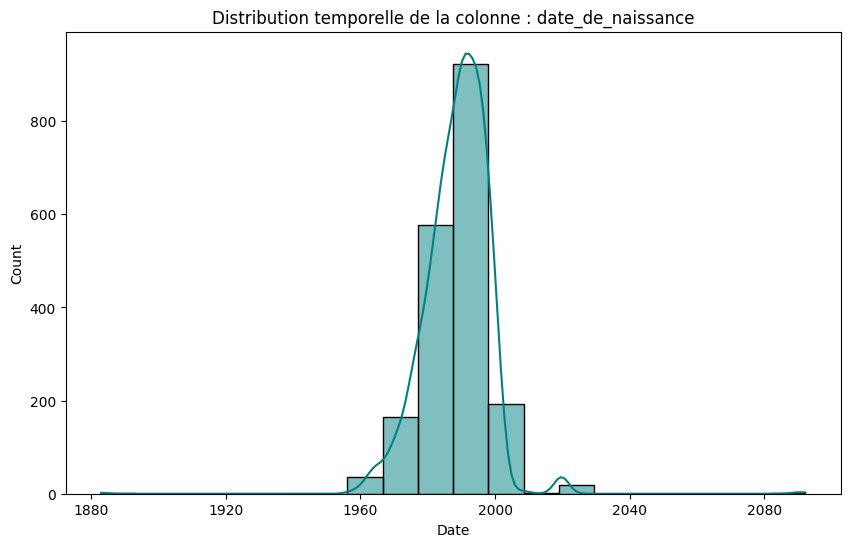

🔎 Répartition par année :
date_de_naissance
1882      1
1957      1
1958      1
1959      1
1960      2
1961      1
1962      7
1963      1
1964     10
1965      7
1966      6
1967      2
1968     11
1969     11
1970     13
1971     13
1972     13
1973     15
1974     21
1975     28
1976     34
1977     36
1978     30
1979     37
1980     50
1981     54
1982     53
1983     53
1984     79
1985     77
1986     70
1987     75
1988     78
1989     86
1990    110
1991     81
1992     97
1993     83
1994     98
1995     83
1996     91
1997     79
1998     54
1999     55
2000     47
2001     29
2002      6
2003      1
2007      1
2008      1
2009      1
2019     12
2020      7
2089      1
2092      1
Name: count, dtype: int64

🔎 Répartition par mois (tous les mois confondus) :
date_de_naissance
1     237
2     157
3     181
4     179
5     179
6     165
7     136
8     159
9     131
10    143
11    135
12    113
Name: count, dtype: int64
✅ **Examen terminé**



In [212]:
examiner_colonne(df, COLUMNS['DATE_DE_NAISSANCE'])

### **🔎 Observation**
- Nous remarquons des années de naissance supérieur a l'année actuelle.

### 🛠️ **Traitements à effectuer**
- Nous allons les remplacer par le mode

In [213]:
# Obtenir l'année actuelle
current_year = datetime.now().year

# Remplacer les années supérieures à l'année actuelle par le mode
df[COLUMNS['DATE_DE_NAISSANCE']] = df[COLUMNS['DATE_DE_NAISSANCE']].apply(lambda x: mode(df[COLUMNS['DATE_DE_NAISSANCE']]) if x.year > current_year else x)

🔎 **Examen de la colonne : `date_de_naissance`**

📋 Type de colonne détecté : **Date**

📋 Informations générales :
- Type de données : datetime64[ns]
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 1614
date_de_naissance
2001-01-01    18
1990-01-01     5
1996-05-29     5
2000-01-01     5
1995-11-26     5
1994-01-01     4
1985-05-12     4
1996-01-01     4
1994-10-25     3
1977-02-27     3
Name: count, dtype: int64

🔵 Analyse des valeurs inhabituelles :
date_de_naissance
2001-01-01    18
1990-01-01     5
1996-05-29     5
2000-01-01     5
1995-11-26     5
1994-01-01     4
1985-05-12     4
1996-01-01     4
1994-10-25     3
1977-02-27     3
Name: count, dtype: int64

🗓️ Analyse temporelle de la colonne date :
- Date la plus ancienne : 1882-11-18 00:00:00
- Date la plus récente : 2020-11-23 00:00:00


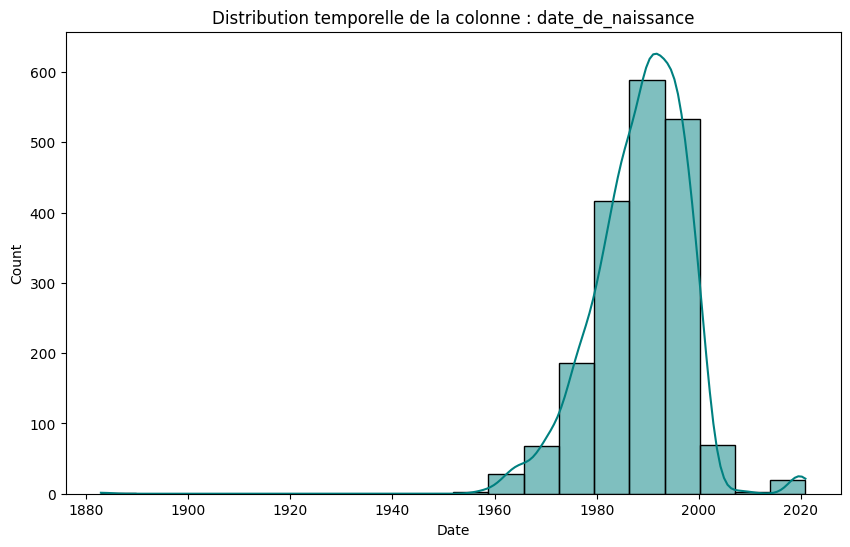

🔎 Répartition par année :
date_de_naissance
1882      1
1957      1
1958      1
1959      1
1960      2
1961      1
1962      7
1963      1
1964     10
1965      7
1966      6
1967      2
1968     11
1969     11
1970     13
1971     13
1972     13
1973     15
1974     21
1975     28
1976     34
1977     36
1978     30
1979     37
1980     50
1981     54
1982     53
1983     53
1984     79
1985     77
1986     70
1987     75
1988     78
1989     86
1990    110
1991     81
1992     97
1993     83
1994     98
1995     83
1996     91
1997     79
1998     54
1999     55
2000     47
2001     31
2002      6
2003      1
2007      1
2008      1
2009      1
2019     12
2020      7
Name: count, dtype: int64

🔎 Répartition par mois (tous les mois confondus) :
date_de_naissance
1     239
2     157
3     180
4     179
5     179
6     164
7     136
8     159
9     131
10    143
11    135
12    113
Name: count, dtype: int64
✅ **Examen terminé**



In [214]:
examiner_colonne(df, COLUMNS['DATE_DE_NAISSANCE'])

## 5.13- Age (Création)

🔎 **Examen de la colonne : `age`**

📋 Type de colonne détecté : **Quantitative**

📋 Informations générales :
- Type de données : int32
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 52
age
29    108
25     99
27     96
23     91
30     86
26     83
24     82
22     81
28     80
35     79
Name: count, dtype: int64

📊 Statistiques descriptives :
count    1915.000000
mean       30.731593
std         9.466822
min        -1.000000
25%        25.000000
50%        30.000000
75%        36.000000
max       137.000000
Name: age, dtype: float64


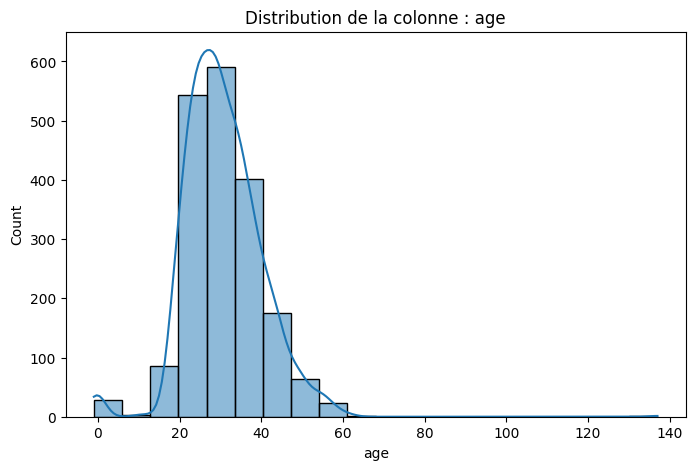

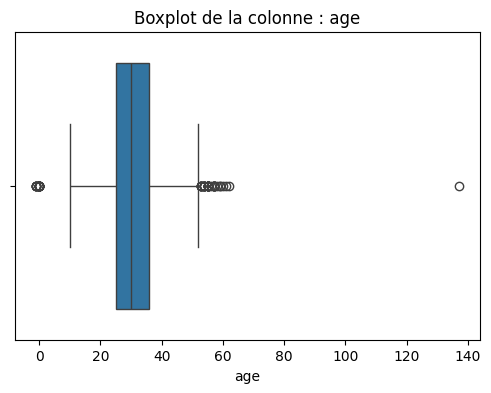

🔵 Analyse des valeurs inhabituelles :
age
29    108
25     99
27     96
23     91
30     86
26     83
24     82
22     81
28     80
35     79
Name: count, dtype: int64

🚨 Outliers détectés :
- Nombre d'outliers détectés : 66

✅ **Examen terminé**



In [215]:
# Créer une colonne "age" en calculant la différence entre l'année de remplissage et l'année de naissance
df[COLUMNS['AGE']] = df[COLUMNS['DATE_DE_REMPLISSAGE']].dt.year - df[COLUMNS['DATE_DE_NAISSANCE']].dt.year

# Afficher le DataFrame avec la nouvelle colonne "age"
examiner_colonne(df, COLUMNS['AGE'])

### **🔎 Observation**
- Nous remarquons des individus avec **0 ans**, ce qui n'est pas logique car un nouveau née ne peut pas faire un don de sang
- Nous remarquons un individu qui a **137 ans**,
- Nous remarquons des individus avec un age négatif

### 🛠️ **Traitements à effectuer**
Nous allons remplacer tout les ages incohérent par le mode.
- La tranche d'age en moyen pour faire un don de sang est de 18 à 65 ans nous allons donc estimer comment intervalle d'age conhérent les ages compris entre ]6, 80]

In [216]:
# Remplacer les âges supérieurs à 80 et inférieurs à 6 par le mode
df[COLUMNS['AGE']] = df[COLUMNS['AGE']].apply(lambda x: mode(df[COLUMNS['AGE']]) if x > 80 or x < 6 else x)

🔎 **Examen de la colonne : `age`**

📋 Type de colonne détecté : **Quantitative**

📋 Informations générales :
- Type de données : int64
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 49
age
29    137
25     99
27     96
23     91
30     86
26     83
24     82
22     81
28     80
35     79
Name: count, dtype: int64

📊 Statistiques descriptives :
count    1915.000000
mean       31.102350
std         8.343649
min        10.000000
25%        25.000000
50%        30.000000
75%        36.000000
max        62.000000
Name: age, dtype: float64


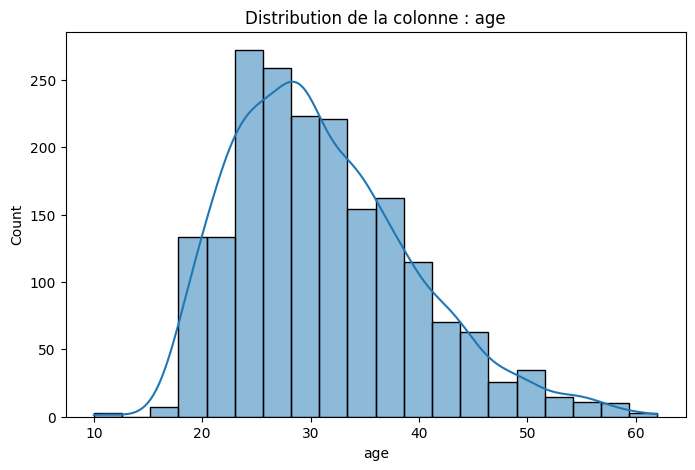

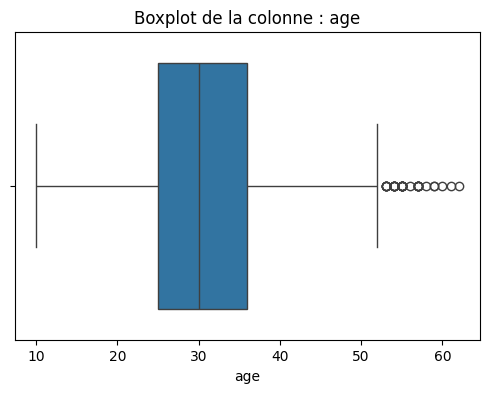

🔵 Analyse des valeurs inhabituelles :
age
29    137
25     99
27     96
23     91
30     86
26     83
24     82
22     81
28     80
35     79
Name: count, dtype: int64

🚨 Outliers détectés :
- Nombre d'outliers détectés : 37

✅ **Examen terminé**



In [217]:
examiner_colonne(df, COLUMNS['AGE'])

## 5.14- Date de dernière règle

🔎 **Examen de la colonne : `date_de_dernieres_regles_(ddr)`**

📋 Type de colonne détecté : **Date**

📋 Informations générales :
- Type de données : datetime64[ns]
- Nombre total de valeurs non-nulles : 40 / 1915
- Proportion de valeurs manquantes : 97.91%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 36
date_de_dernieres_regles_(ddr)
2019-09-23    2
2019-05-23    2
2019-10-17    2
2019-08-17    2
2019-10-06    1
2019-04-11    1
2019-04-26    1
2019-03-22    1
2019-07-23    1
2019-07-26    1
Name: count, dtype: int64

🔵 Analyse des valeurs inhabituelles :
date_de_dernieres_regles_(ddr)
NaT           1875
2019-05-23       2
2019-10-17       2
2019-08-17       2
2019-09-23       2
2019-07-26       1
2019-04-11       1
2019-04-26       1
2019-03-22       1
2019-07-23       1
Name: count, dtype: int64

🗓️ Analyse temporelle de la colonne date :
- Date la plus ancienne : 2019-01-25 00:00:00
- Date la plus récente : 2019-11-09 00:00:00


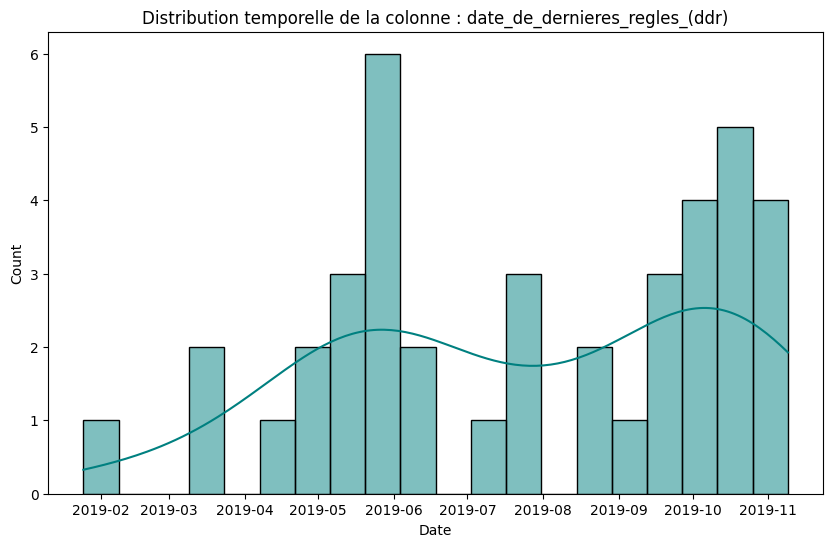

🔎 Répartition par année :
date_de_dernieres_regles_(ddr)
2019.0    40
Name: count, dtype: int64

🔎 Répartition par mois (tous les mois confondus) :
date_de_dernieres_regles_(ddr)
1.0      1
3.0      2
4.0      2
5.0      7
6.0      5
7.0      4
8.0      2
9.0      5
10.0    10
11.0     2
Name: count, dtype: int64
✅ **Examen terminé**



In [218]:
examiner_colonne(df, COLUMNS['DATE_DE_DERNIERES_REGLES'])

### **🔎 Observation**
- Nous avons plus de **95%** de valeur manquante, et plus elle permet d'expliquer une raison de non disponibilité a cause de la date des dernière règle.

### 🛠️ **Traitements à effectuer**
- Suppression de cette colonne

In [219]:
# suppresion de colonne
df.drop(COLUMNS['DATE_DE_DERNIERES_REGLES'], axis=1, inplace=True)

## 5.14- Taux d'hemoglobine

In [220]:
examiner_colonne(df, COLUMNS['TAUX_HEMOGLOBINE'])

🔎 **Examen de la colonne : `taux_d_hemoglobine`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1070 / 1915
- Proportion de valeurs manquantes : 44.13%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 148
taux_d_hemoglobine
13      76
14      49
13.4    37
13.5    34
13.6    33
13.9    32
13.8    31
15      30
14.9    28
13.7    27
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 1050
- Présence de caractères spéciaux : 865



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')



🏆 **Mode (valeur la plus fréquente) :** `13`
🔵 Analyse des valeurs inhabituelles :
taux_d_hemoglobine
NaN     845
13       76
14       49
13.4     37
13.5     34
13.6     33
13.9     32
13.8     31
15       30
14.9     28
Name: count, dtype: int64

✅ **Examen terminé**



### **🔎 Observation**
- Cette colonne permet d'explique une raison de non indisponibilité à cause d'un taux d'hémoglobine bas
- Et cette caractéristique n'entre pas en jeu dans les fonctionnalités à dévélopper

### 🛠️ **Traitements à effectuer**
- Suppression de cette colonne

In [221]:
# suppresion de colonne
df.drop(COLUMNS['TAUX_HEMOGLOBINE'], axis=1, inplace=True)

## 5.13- Quartier de residence

🔎 **Examen de la colonne : `quartier_de_residence`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 583
quartier_de_residence
Douala          179
Yassa            52
Village          34
Deido            33
Bonamoussadi     31
DOUALA           31
Non précisé      29
Nyalla           29
Logbaba          29
Makepe           26
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 113
- Présence de caractères spéciaux : 158



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


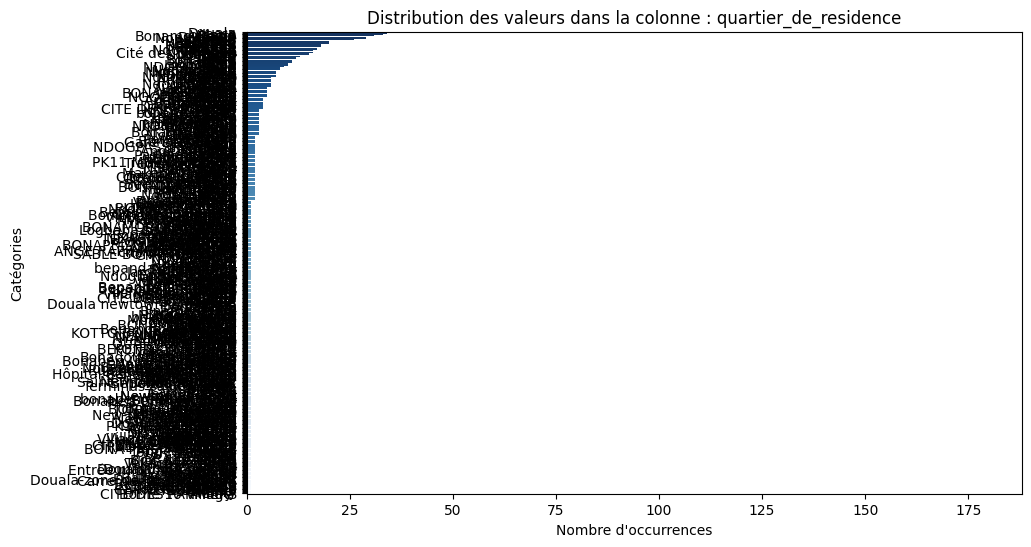


🏆 **Mode (valeur la plus fréquente) :** `Douala`
🔵 Analyse des valeurs inhabituelles :
quartier_de_residence
Douala          179
Yassa            52
Village          34
Deido            33
Bonamoussadi     31
DOUALA           31
Non précisé      29
Nyalla           29
Logbaba          29
Makepe           26
Name: count, dtype: int64

✅ **Examen terminé**



In [222]:
examiner_colonne(df, COLUMNS['QUARTIER_DE_RESIDENCE'])

### **🔎 Observation**
- Beaucoup de valeur identique mais mal écrite 

### 🛠️ **Traitements à effectuer**
- **Standardisation des valeurs** (ex. uniformiser la casse).  

In [223]:
corrections_quartiers = {
    ('akoua', 'akwa', 'akwa ngodi', 'akwa nord'): "akwa",
    
    ('ange raphael', 'ange raphael campus 2','ange raphaël','anhe rafael', 'ange rafael'): "ange-raphael",
     
    ('ari', 'ari village','carrefour ari','carrefour agip'): "ari",
    ('beedi', 'beedi malangue'): "beedi",
    
    ('axe lourd bependa',  'bepanda omnisport', 'bepanda omnisports','bependa aeroport','bependa maturite', 'bependa tonnerre','bependa casmando','bependa','bepanda'): "bependa",
    ('besengue', 'bessengue', 'essengue', 'gare bessengue'): "bessengue",
    ('billongue', 'bilongue'): "bilongue",
    
    ('binamoussadi','bonamoussadi','sable bonamoussadi') : "bonamoussadi",
    ('bois de singe', 'bois des singes'):'bois des singes',
    
    ('boko', 'boko cogefar', 'boko plage','boko village', 'boko-plage','kambo boko'): 'boko',
    ('bonabeerie', 'besseke bonaberi','bonaberi','bonaberi entree cebec', 'bonaberi ndoba', 'bonaberi ndobo', 'bonaberi sctm','bonabéri',
     'bonabéri', 'bonabéri (grand baobab)', 'bonabéri grand-hangar'): "bonaberi",
    
    ('bona priso goupwe','bonadouma-bonapriso', 'bonaorisso', 'bonapriso','bonapriso 2', 'bonapriso rue koloko','rue koloko bonapriso'): "bonapriso",
    ('bonandjo', 'bonanjo'):"bonandjo",
    
    ('bonateki', 'bonateki deido','deido','deïdo', 'déido'):"deido",
    
    ('borne 10', 'borne 10 village','cité belge','cite berge', 'ipd', 'itba village', 'village','tradex village', 'village borne 10', 'village cite de bille'
     , 'village entrée bille', 'village entrée lycée', 'village marche', 'village marché', 'villoage marche','shele village', 'she’ll village', 'she’ll-village'): "village",
    
    ('bp cite', 'bp cité', 'bp site', 'bp8232'):"bp-cité",
    ('brassaville', 'brazaville', 'brazzaville'):"brazaville",
    ('ccc', 'ccc ndokotti','douala ccc','ndokoti', 'ndokotti','ndokotti ccc','rond point ccc'):"ndokotti",
    
    ('cite cic','cite cicam','cite de cille', 'cite de bille','cite sic','cité maetude', 'cité sic', 'cité-sic', 'cité-sic bassa','nouvelle route cité sic', 'cite cic'):"cité cic",
    ('cite de palmier', 'cite des pakmiers', 'cite des palmiers','citee des palmiers','cité des palmiers'):"cité des palmiers",
    ('cogefar', 'combi', 'congefar','entrée mini cité cogefar','village cogefar'): "cogefar",
    
    ( 'bakie ndagpassi','bdogpassi', 'dogbassi', 'dogbassi 3', 'dogpassi','douala ndogpassi', 'douala ndopassiz','Ndogpassi',
     'ndobassi 2', 'ndog passi 3', 'ndog-passi','ndogbassi','ndogpass 3', 'ndogpassi', 'ndogpassi i', 'ndogpassi ii', 'ndogpassi iii',
     'ndogpassi marché', 'ndogpassi village', 'ndogpassi3', 'ndogpassi3', 'ndogpassiii', 'ndogpossi','ndogpassi 1', 'ndogpassi 2', 'ndogpassi 3',
     'ndokpassi'):"ndogpassi",
    
    ('dibom iii', 'dibombari', 'diboum 3'):"dibombari",
    ('douala','douala douala','douala 812.12','douala non précisé','douala(non) précisé', 'douala-douala', 'douala-zone de reeassement'):"douala",
    ('douala newbell', 'douala newtown  aéroport', 'new bel','new bell','new bell bassa', 'new priso', 'new ton aeroport',
     'new town aéroport', 'new-bell','new-bell /nkouloulou', 'new-deido','newbell','newton  airport', 'newton aeroport', 'newton aéroport',
     'nkoulouloun','pk5', 'pk5 new bell'): "newbell",
    
    ('nyalla', 'douala nyalla','nialla','nyala', 'nyala château', 'nyalla chateau', 'nyalla haoussa', 'nyalla japoma', 'nyalla kambo 2',
     'nyalla pariazo','nyalla pariso', 'nyalla pays bas', 'nyalla-kambo','parisot nyalla', 'nyassa', 'nylon', 'nylon brazzaville', 'nylon brazzaville', 'n’y alla pariso'): "nyalla",
    
    ( 'edea', 'edéa','édea'):"édéa",
    ('elf', 'elf (rond point)'): "elf",
    ('douala oyack','oyack'): "oyack",
    ('enri', 'entree bille', 'entree billes'): "entrée billes", 
    ('entree chinoise', 'entrée chinois','entrée chinois'): "entrée chinoise",
    ('harry', 'harry yassa', 'henry'): "yassa",
    ('hôpital général', 'hôpital général de douala'): "hopital général",
    ('japoma', 'japouma'): "japoma",
    ('jardin logbaba','jardin ndogmbe', 'journaliste','log baba', 'log-baba', 'logbaba','logbaba jardin', 'logbaba plateau', 'logbaba saint thomas', 'logbaba st thomad', 'saint thomas', 'saint thomas logbaba'): "logbaba",
    ('kms', 'kotto', 'kotto bonamoussadi', 'kotto immeuble', 'kotto- chefferie') : "kotto",
    ('logbesou', 'logbessou') : "logbessou" ,
    ('makepe', 'makepe misoke', 'makepe missoke', 'makèpè') : "makepe" ,
    ('ndg-bong','ndobo','ndobong','ndogbong citadelle', 'ndongbong', 'dongbang') : "ndongbong",
    ( 'ndogsibi', 'ndogsimbi','ndogssimbi') :"ndogssimbi",
    ('ngodi', 'ngodi akwa','ngodi bakogo','ngodi bakoko', 'ngodi bonomo', 'ngodi- akwa', 'ngodi- bakoko'):"ngodi",
    ('nkol mbong','nkolbon', 'nkolbong', 'total nkolobong', 'total nkolbong', 'total nkolmbon') : "nkolbong", 
    ('nkomondo', 'nkong mondo', 'nkong-mondo', 'nkongmondo', 'nkonguondo', 'nkonmondo') : "nkomondo",
    ('nkouabang'): "nkoabang",
    ('non precise', 'non precisé','non précisé','pas mentionné', 'pas precise','pas précisé','pas precisé','pihidibamba', 'r a s', 'r .a.s','ras','rien', 'r as', 'aucun', 'non précise'): "pas précisé",
    ("pk8", 'pk 8 entrée laïque') : "pk 8",
    ('pk13','pk13', 'pk13 bassa'):"pk 13",
    ('pk16','pk16 nsape', 'pk16(sappe )'):"pk 16",
    ('pk11 bassa', 'pk11 mbengue city', "pk11"): "pk 11",
    ('pk12 emmene cite','pk12 mandjab','pl12', "pk12") : "pk 12",
    ('yassa','yassa tika') : "yassa",
    ('yaounde', 'yaoundé'): "yaoundé",
    ('yatchika', 'yatika') : "yatchika",
    ('tradex borne 10', 'tradex kotto') : "kotto",
    ('tergal', 'tergale') : "tergal" , 
    ('soboum', 'soboum-dakar','souboun'): "soboum",
    ('terminus', 'terminus saint michel', 'terminus ucb') : "terminus",
    ('song mahop', 'songmahop'): "songmahop",
    ( 'texaco aeroport', 'texaco aéroport', 'total aeroport'): "texaco aeroport",
    ('yansoki','yansoki bakoko') : "yansoki",
    ('tradex bonne dix', 'tradex borne 10') : "borne 10",
    ('ndopassi iii', 'ndopassi 3') : "Ndogpassi 3",
    ('cite de la paix', 'ndopassi 3') : "cité de la paix",
    ('missole ii') : "missole 2"
}

# Fonction de correction
def corriger_quartier(quartier):
    quartier = quartier.lower().strip()
    for keys, valeur_corrigee in corrections_quartiers.items():
        if quartier in keys:
            return valeur_corrigee
    return quartier

# Appliquer la correction
df[COLUMNS['QUARTIER_DE_RESIDENCE']] = df[COLUMNS['QUARTIER_DE_RESIDENCE']].apply(corriger_quartier)


🔎 **Examen de la colonne : `quartier_de_residence`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 158
quartier_de_residence
douala         241
ndogpassi      104
pas précisé     96
nyalla          82
newbell         80
yassa           79
village         70
bonaberi        62
logbaba         53
bependa         53
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 210



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


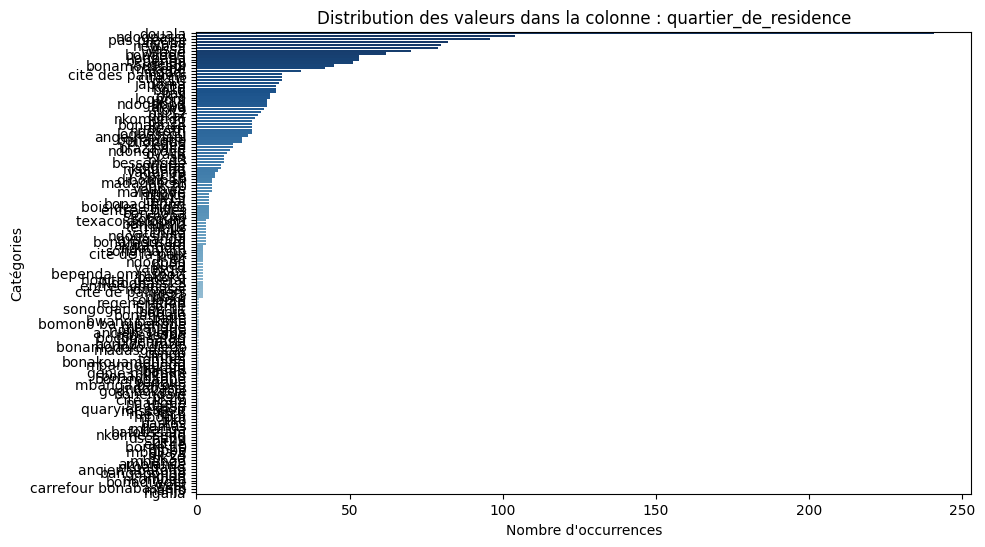


🏆 **Mode (valeur la plus fréquente) :** `douala`
🔵 Analyse des valeurs inhabituelles :
quartier_de_residence
douala         241
ndogpassi      104
pas précisé     96
nyalla          82
newbell         80
yassa           79
village         70
bonaberi        62
logbaba         53
bependa         53
Name: count, dtype: int64

✅ **Examen terminé**



In [224]:
examiner_colonne(df, COLUMNS['QUARTIER_DE_RESIDENCE'])

## 5.13- Arrondissement de résidence

In [225]:
examiner_colonne(df, COLUMNS['ARRONDISSEMENT_DE_RESIDENCE'])

🔎 **Examen de la colonne : `arrondissement_de_residence`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 42
arrondissement_de_residence
Douala (Non précisé )    976
Douala 3                 406
Douala 5                 223
Douala 2                  80
Douala 1                  73
Douala 4                  62
Yaounde                   14
Non précisé               14
Edea                      11
R A S                      6
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 7
- Présence de caractères spéciaux : 998



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')



🏆 **Mode (valeur la plus fréquente) :** `Douala (Non précisé )`
🔵 Analyse des valeurs inhabituelles :
arrondissement_de_residence
Douala (Non précisé )    976
Douala 3                 406
Douala 5                 223
Douala 2                  80
Douala 1                  73
Douala 4                  62
Yaounde                   14
Non précisé               14
Edea                      11
R A S                      6
Name: count, dtype: int64

✅ **Examen terminé**



### **🔎 Observation**
- Beaucoup de valeur identique mais mal écrite 
- Nous avons certains arrondissement qui ne sont pas précisé et que le quartier est précisé.
- Nous avons remarqué la presence de quartier portant le nom de ville, ce qui nous permet de connaitre la ville mais depression sur le quartier

### 🛠️ **Traitements à effectuer**
- **Standardisation des valeurs** (ex. uniformiser la casse).  
- Recherche de l'arrondissement en fonction du quartier
- Creation de la colonne Ville puis suppression des quartiers portant le nom de ville

In [226]:
correction_mapping = {
    'ras' : 'pas précisé',
    'r a s' : 'pas précisé',
    'non précisé' : 'pas précisé',
    'pas precise' : 'pas précisé',
    'pas mentionné' : 'pas précisé',
    'non precisé' : 'pas précisé',
    'douala non précisé' : 'douala(pas précisé)',
    'doualanon précisé' : 'douala(pas précisé)',
    'douala' : 'douala(pas précisé)',
    'douala (non précisé )' : 'douala(pas précisé)',
    'yaounde' : 'yaoundé(pas précisé)',
    'yaoundé' : 'yaoundé(pas précisé)',
    'yaoundénon précisé' : 'yaoundé(pas précisé)',
    'yaoundé(non précisé)' : 'yaoundé(pas précisé)',
    'dcankongmondo':'nkongmondo',
    'edea':'édea',
    'deido': 'douala 1',
    # 'nkouabang' : ''
}

# Standardisation des valeurs
df = standardiser_colonne(df, COLUMNS['ARRONDISSEMENT_DE_RESIDENCE'], correction_mapping)

✅ Colonne `arrondissement_de_residence` standardisée avec succès !


In [227]:
# Correction des arrondissements
df = corriger_arrondissement(df, COLUMNS['ARRONDISSEMENT_DE_RESIDENCE'], COLUMNS['QUARTIER_DE_RESIDENCE'], VILLES)

✅ Correction des arrondissements terminée avec succès (en minuscule et sans accents).


In [228]:
# Creation de la colonne ville
df = ajouter_colonne_ville(df, COLUMNS['ARRONDISSEMENT_DE_RESIDENCE'], COLUMNS['QUARTIER_DE_RESIDENCE'], VILLES)

✅ Colonne ville ajoutée avec succès.


In [229]:
# Suppression des valeurs arrondissements dont les noms sont des villes

# Remplacement de l'année "douala" par "pas précisé"
df = corriger_valeurs(df, COLUMNS['QUARTIER_DE_RESIDENCE'], motif="douala", remplacement="pas précisé")

# Remplacement de l'année "douala" par "pas précisé"
df = corriger_valeurs(df, COLUMNS['QUARTIER_DE_RESIDENCE'], motif="yaoundé", remplacement="pas précisé")

In [230]:
# Examination de la colonne ville
examiner_colonne(df, COLUMNS['VILLE'])

🔎 **Examen de la colonne : `ville`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 3
ville
douala     1816
inconnu      71
yaounde      28
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 0



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')



🏆 **Mode (valeur la plus fréquente) :** `douala`
🔵 Analyse des valeurs inhabituelles :
ville
douala     1816
inconnu      71
yaounde      28
Name: count, dtype: int64

✅ **Examen terminé**



🔎 **Examen de la colonne : `arrondissement_de_residence`**

📋 Type de colonne détecté : **Qualitative**

📋 Informations générales :
- Type de données : object
- Nombre total de valeurs non-nulles : 1915 / 1915
- Proportion de valeurs manquantes : 0.00%

🔹 Valeurs uniques :
- Nombre de valeurs uniques : 31
arrondissement_de_residence
douala(pas précisé)     629
douala 3                542
douala 5                293
douala 1                156
douala 2                128
douala 4                 62
pas précisé              41
yaoundé(pas précisé)     13
édea                     11
yaounde 3                10
Name: count, dtype: int64

🟠 Vérification des incohérences :
- Présence d'espaces inutiles : 0
- Présence de caractères spéciaux : 694



/home/dv-fk/Documents/Challene indabax 2025/projet_analyse_don/notebooks/../utils/data_cleaning.py:178: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=colonne, order=df[colonne].value_counts().index, palette='Blues_r')


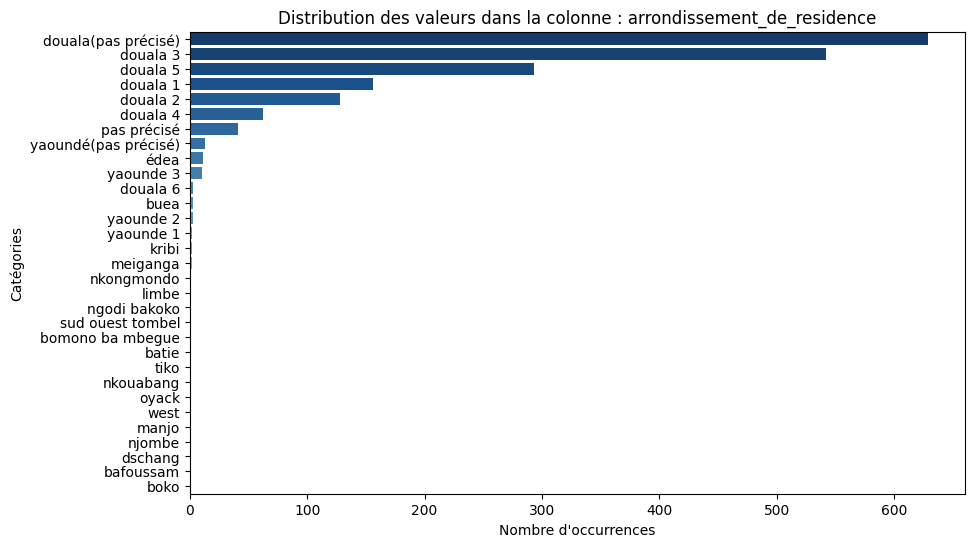


🏆 **Mode (valeur la plus fréquente) :** `douala(pas précisé)`
🔵 Analyse des valeurs inhabituelles :
arrondissement_de_residence
douala(pas précisé)     629
douala 3                542
douala 5                293
douala 1                156
douala 2                128
douala 4                 62
pas précisé              41
yaoundé(pas précisé)     13
édea                     11
yaounde 3                10
Name: count, dtype: int64

✅ **Examen terminé**



In [231]:
examiner_colonne(df, COLUMNS['ARRONDISSEMENT_DE_RESIDENCE'])

In [232]:
# Exportation du fichier néttoyé au format csv
df.to_csv('../data/feuille_2019_cleaned.csv', index=False)